In [31]:
#Bibliotecas que podem ser uteis
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import poisson
from scipy.optimize import curve_fit
import latexify
import random
import datetime as dt
from pandas_datareader import data as pdr
from numpy import linalg as LA
import yfinance as yf

# Análise estatística
### A base de tudo 

_Thiago Laidler Vidal Cunha_

## Planejamento 

    1 - Métodos científico 
    2 - Cuidado com estatística descritiva e descrições enganosas 
    3 - Probabilidade Básica + Bayes + problemas com probabilidade 
    4 - Distribuições + teorema do limite central
    5 - Correlações + Métodos
    6 - Como modelar dados e estimar parâmetros. (Regressão linear, Chi quadrado e Monte Carlo)

# 1)
## O método científico 

O método científico é um conjunto de normas que orientam a produção do conhecimento científico. É preciso juntar evidências empíricas verificáveis, baseadas na observação de experimentos de maneira sistemática e controlada. Com isso, podemos analisar as evidências com o uso da lógica e utilizá-las para refutar ou comprovar diferentes teorias científicas. É através do método científico que podemos explorar o mundo ao nosso redor de forma coerente e informativa.

Na análise das evidências empíricas no método científico, a estatística tem um papel fundamental. Ela é responsável por coletar, organizar, analisar e interpretar dados, permitindo que as conclusões retiradas das evidências sejam mais precisas e confiáveis. Além disso, a estatística é amplamente utilizada em diversas áreas do conhecimento, desde a **astrofísica** até o **mercado financeiro** (puxando minha sardinha tendo em visto que tenho formação em astrofísica e trabalho no mercado financeiro). 

>Em consequência à minha experiência pessoal, muitos dos exemplos abordados nesse artigo serão baseados nesses dois mundos. Apesar de não parecer, há muito em comum entre os instrumentos matemáticos utilizados para calcular as informações vindas do mercado, e as informações vindas das estrelas.

Para aqueles que desejam se aprofundar em estatística, existem diversas opções de materiais didáticos disponíveis, como as referências bibliográficas que utilizei para escrever esse artigo (uma delas é o clássico livro "Estatística Básica", de Bussab e Morettin), além de cursos online (em breve, planejo gravar um). Assim, é minha sincera esperança que este material o auxilie a compreender melhor este assunto tão fascinante.

É importante ressaltar que este artigo deve ser utilizado como *complemento* ao estudo e não como a única fonte de informações, já que falta explorações e desenvolvimentos mais detalhados ao longo das explicações. O objetivo é apenas facilitar a compreensão e organizar as partes que julguei mais importantes para qualquer profissional que trabalhe com dados.

Espero que goste.

# 2)
## Cuidados com estatística descritiva e descrições enganosas!
 - A média, a mediana e suas simplificações 
 
A partir de uma base estatística bem consolidada, e uma curiosidade em explorar o mundo (que todo cientista tem ou deve ter), podemos explorar questões interessantes que, aparentemente, não estão relacionadas. 

Por exemplo, (1) Qual a situação da saúde econômica da classe média hoje?; e (2) quem foi o maior jogador de futebol de todos os tempos?
    
    (1) Essa pergunta é vital para a política de qualquer país. O bem-estar financeiro desse grupo tende a ser um indicador fundamental da saúde econômica de uma nação. 
    (2) Essa pergunta é trivial. No entanto, assim como a primeira, nos é útil para ilustrar as forças e limitações da estatística descritiva.
    
Podemos tentar demonstrar que Cristiano Ronaldo é um grande jogador de futebol ao descrever cada passe em cada jogo da Liga dos Campeões da UEFA que ele jogou (dados brutos muito dificeis de se analisar, tendo em vista que Cristiano Ronaldo jogou por aproximadamente vinte anos), ou podemos calcular que ao final da temporada de 2015, Jeter teve uma média de passes na carreira de 0,313. Essa é uma estatística descritiva.

Acontece que a **média** de passes é uma simplificação grosseira das várias temporadas de Ronaldo. Os especialistas em futebol possuem um bando de estatísticas descritivas que consideram mais valiosas do que a média de passes. Ainda assim, idealmente, gostaríamos de achar o equivalente econômico da média de passes, ou algo ainda melhor, para explicar a saúde econômica de uma parcela considerável do país. Queremos uma _medida simples e precisa_ de como o bem-estar econômico do trabalhador típico tem mudado nos últimos anos. Uma tentativa razoável seria calcular a mudança na renda per capita no decorrer de uma geração, (aproximadamente trinta anos). A renda per capita é uma média simples: renda total dividida pelo tamanho da população. Por essa medida, a renda média no Brasil subiu de 3.100 dolares em 1990 para 6.796,84 dolares em 2020.
    
    Há um problema. O cálculo está tecnicamente correto, mas totalmente errado em termos da nossa interpretação. Além da não correção pela inflação (3.100 dolares em 1990 equivalem a 6.324,54 dolares em 2020), a renda média do Brasil não é igual a renda do brasileiro médio!

A renda per capita pega meramente toda a renda ganha no país e a divide pelo número de pessoas, o que não nos informa muita coisa. Um crescimento explosivo na renda do top 1% da pirâmide social pode aumentar significativamente a renda per capita sem que nenhum centavo a mais entre no bolso do restante da população. 
    
> Do futebol à renda à astrofísica, a tarefa básica quando se trabalha com dados é sintetizar uma grande dose de informação. Há cerca de 200 milhões de habitantes no Brasil, e uma planilha poderia armazenar o nome e histórico de renda de cada indivíduo. Poderíamos ter acesso total à informação que desejamos sobre a saúde econômica do país. Todavia, seria também tão difícil de manejar que não nos diria absolutamente nada. No trabalho como astrônomos precisamos lidar com quantidade gigantescas de dados (para se ter uma ideia, estima-se que a nossa galáxia, a Via Láctea, possui cerca de 400 bilhões de estrelas, o que é cerca de 50x a quantidade de pessoas no mundo), e caímos na mesma problemática.
    

Ou seja, para tornar os dados úteis, escolhemos simplificar. Realizamos cálculos para reduzir um complexo arranjo de dados e um punhado de números que descrevam esses dados, exatamente da mesma forma que sintetizamos uma complexa e multifacetada performance de dança com um número: 9,8.

> A estatística descritiva nos dá um resumo manejável e significativo dos fenômenos, no entanto, **qualquer simplificação convida ao abuso.** 

Voltando á análise da renda per capita, vemos claramente que calcular a **média** de um grupo pode não ser o ideal. Se em um grupo de 9 trabalhadores, com renda média de 2.000 reais por mês, se encontram num bar com um amigo rico, com renda de 50.000 reais por mês, o ganho médio do grupo de 10 amigos sobe, sem que os trabalhadores recebam mais. Por essa razão, temos outra estatística que também sinaliza o 'meio' de uma distribuição: a **mediana**.

    A mediana é o ponto que divide uma distribuição ao meio (em que metade das observações jaz acima e a outra metade abaixo). No caso dos amigos no bar, mesmo que entre mais um amigo rico, a mediana não irá se alterar (e será o valor de 2000 reais).
> Para distribuições sem valores atípicos sérios, a **mediana** e a **média** serão semelhantes. 

A mediana é interessante nesses casos de problemas com _outliers_, em que alguns valores atípicos inflam a média, mas não a mediana. 

> Nem a mediana, nem a média são difíceis de calcular; a chave é determinar que medida do 'meio' é mais acurada (proxima do ideal) numa situação particular. 


- Outras estatísticas descritivas:

A mediana tem alguns correspondentes úteis, podemos dividir a distribuição pela metade, em **quartis** *(cada um sendo um recorte de 25% da distribuição)* ou em **decis** *(cada um sendo um recorte de 10%)*. Note que estamos explorando conceitos _relativos_ (se analisamos a performance de um aluno, a dificuldade da prova pode ser relevada já que seu resultado final é comparado ao restante da turma) em contraste com valores _absolutos_ (a nota tirada na prova, independente de qual foi a performance alheia).

Outra estatísitca que pode nos ajudar a descrever o que de outro modo poderia ser apenas um juntamento de números é o **desvio padrão** (medida de como os dados se dispersam em relação à média). 
> O quanto elas estão espalhadas?

$DP^{2} = \sum_{i=1}^{N} \frac{(x_{i} - \tilde{x})^2}{n}$

 Suponhamos que coletassemos dados sobre o peso de 250 pessoas num avião com destino a São Paulo e também levantasse o peso de uma amostra de 250 qualificados para a Maratona de Niterói. 
 
 Agora, suponha que o peso médio para ambos os grupos seja aproximadamente o mesmo, digamos setenta quilos (sabendo que, no mesmo vôo, teremos pessoas que precisarão ocupar quase duas poltronas inteiras, assim como alguns bebês de colo e crianças malcriadas).
 
Com base nas ferramentas descritivas introduzidas até aqui, **os pesos dos passageiros do avião e dos maratonistas são quase identicos, mas não são!** Sim, os pesos terão o mesmo 'meio', mas os passageiros do avião têm uma dispersão muito maior em torno do ponto médio. Os pesos dos passageiros estarão mais 'espalhados' enquanto os maratonistas parecerão pesar mais ou menos a mesma coisa. 
> O desvio padrão é a estatística que nos permite atribuir valor a essa dispersão em torno da média. 

Uma vez que conheçamos a **média**, a **mediana** e o **desvio padrão** para qualquer conjunto de dados, teremos em mãos algum resultado intelectual sério. 

- Distribuição Normal

Sabendo disso, faz-se um bom momento para introduzirmos o conceito de **distribuição normal**. Dados distribuídos normalmente são simétricos em torno de sua média, num formato de sino.

    A distribuição normal descreve vários fenômenos comuns, como a distribuição de frequência com a qual as pipocas estouram numa panela (aos poucos a quantidade de caroços estourando vai aumentando até um máximo, e em seguida torna a cair na mesma proporção que aumentou). As alturas das pessoas têm uma distribuição mais ou menos normal, o que significa que são aproximadamente simétricas em torno de 1,70 metros. 

As *estatísticas descritivas* nos dão a percepção de fenômenos que nos importam. Nesse espírito, podemos voltar a explorar sobre a saúde econômica da classe média brasileira.

Para avaliar isso, podemos examinar as mudanças no salário mediano (corrigido pela inflação) durante as últimas décadas, assim como avaliar os salários no 25° e 75° percentis (razoavelmente limites inferior e superior da classe média). 

Além disso, devemos nos atentar na avaliação da renda ou salários (um é a soma de todos os pagamentos de diferentes fontes, enquanto o outro é aquilo que é pago pelo trabalho). Um trabalhador que pegue outro trabalho irá aumentar sua renda, mas talvez não tenha aumento de salário. Se os indivíduos precisam trabalhar mais para ganhar mais, é difícil avaliar o efeito geral sobre seu bem-estar.

> Ideia de projeto: buscar os dados de salários nas últimas três décadas e analisar sua evolução em cada quartil (plotar real x tempo)

- Descrições podem ser enganosas!

 Embora o campo da estatística esteja enraizado na matemática, o uso da estatística para descrever fenômenos complexos não é exato. Isso deixa uma boa brecha para obscurescer a verdade. 
 > Só há três tipos de mentiras: mentiras, mentiras deslavadas e estatísticas. Mark Twain (humorista)

Já que há inúmeras maneiras de descrever o mesmo fenômeno usando a estatística, a descrição que escolhemos usar (ou não usar) terá profundo impacto sobre a impressão que deixamos. 

O primeiro cuidado é a diferenciar **precisão** e **acurácia**: precisão reflete o grau de exatidão da nossa medida, enquanto a acurácia é a medida da consistência geral de um número com a verdade. 
> Posso apontar para uma pessoa perdida pela cidade, que siga 3,15 km a leste para encontrar o posto mais próximo. A indicação é muito precisa, mas pode não ser acurada (digamos que o posto se encontra ao norte) e ela se perder ainda mais.

A precisão pode mascarar a inacurácia, dando-nos um falso senso de certeza.
> Como ocorreu com Joseph McCarthy, senador anti-comunista americano que, na década de 50, agitou ao ar uma folha de papel e declarou "Tenho aqui na minha mão uma lista de 205 nomes que foram informados ao secretário de Estado como sendo membros do Partido Comunista e que mesmo assim ainda estão trabalhando e elaborando políticas no Departamento de Estado." Descobriu-se mais tarde que o papel não tinha nome algum, mas a especificidade da acusação deu-lhe credibilidade.

Esse tipo de erro afeta parte fundamentais da sociedade, como no exemplo dos modelos de risco de Wall Street antes da crise financeira de 2008. Seus resultados eram bem precisos. O conceito de "valor em risco" permitia às empresas quantificar com precisão a quantidade de capital da firma que podia ser perdido em diferentes cenários. O problema era que os modelos ultrassofisticados eram o equivalente a calibrar nossa fita métrica para jardas. A matemática era complexa e misteriosa. 

As respostas produzidas eram tranquilizadoramente **precisas**. Mas as premissas embutidas nos modelos sobre o que poderia acontecer aos mercados globais estavam simplesmente erradas, tornando as conclusões totalmente **incauradas**, a ponto de desestabilizar não só o Wall Street, mas toda a economia global. 

Até nossas velhas amigas, média e mediana, podem ser usadas com finalidade nefastas. Consideremos os cortes de imposto da era Bush nos EUA, que foram pregados como algo positivo pela administração da época. Enquanto forçava o plano, a administração ressaltava que 92 milhões de americanos receberiam uma redução tributária média de mais de 1.000 dolares. No entanto, essa síntese não estava acurada. 

Embora 92 milhões de americanos tenham começado a pagar menos imposto, a maioria dessa gente não teve um corte de cerca de 1000 dolares. O corte tributário mediano era de menos de 100 dolares. Um número relativamente pequeno de indivíduos muito ricos era elegível para os cortes de impostos muito grandes (distorcendo a média). Nesse caso, a **média nos engana**, e a mediana nos salva devido a sua não sensibilidade a valores extremos.

Obviamente, a mediana pode nos enganar também, justamente devido a sua falta de sensibilidade. Suponha que tenhamos uma doença potencialmente fatal, cuja cura foi até desenvolvida, mas o remédio é extremamente caro e tem efeitos colaterais sérios. *Será que funciona?*, perguntamos. Daí, temos acesso a informação de que há um aumento de duas semanas na mediana de expectativa de vida entre pacientes com a mesma doença. *Talvez a droga não valha a pena...*

Contudo, nesse caso, **a mediana nos engana**! Se muitos pacientes não reagem ao novo tratamento, mas que um grande número (digamos, entre 30~40%) fica inteiramente curado, esse bom desempenho não fica visível na mediana (a expectativa de vida de pelo menos 30% dos pacientes saltou décadas, mas não tivemos essa informação). Nesse caso, pacientes atípicos (que melhoram e vivem bastante) são muito relevantes para nossa decisão. 

> Portanto, a má conduta estatística tem muito pouco a ver com a matemática malfeita. O mais importante é temos boa capacidade de julgamento e integridade.

- Assimetrias e Curtose:

Perceba o que ocorre com a média, mediana e moda da distribuição normal dependendo da sua assimetria.

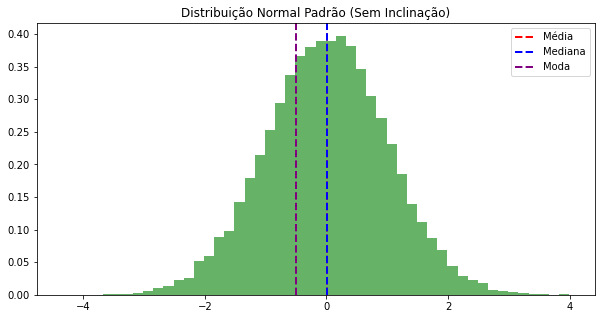


Estatísticas para Distribuição Normal Padrão (Sem Inclinação):
Média: 0.0
Mediana: 0.01
Moda: -0.51
Curtose: 0.0


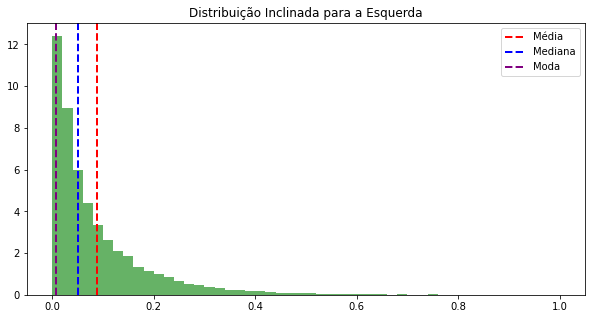


Estatísticas para Distribuição Inclinada para a Esquerda:
Média: 0.09
Mediana: 0.05
Moda: 0.01
Curtose: 0.0


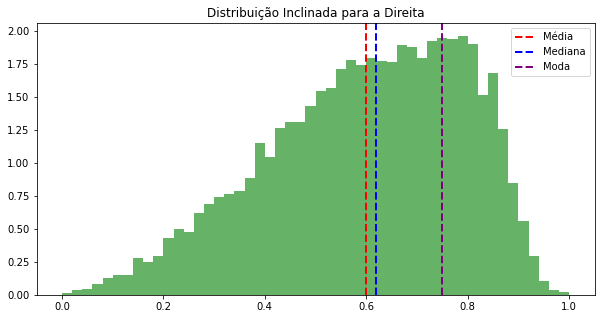


Estatísticas para Distribuição Inclinada para a Direita:
Média: 0.6
Mediana: 0.62
Moda: 0.75
Curtose: 0.0


In [30]:
# Criar dados para uma distribuição normal padrão (sem inclinação)
dados_sem_inclinacao = np.random.normal(size=20000)

# Criar dados para uma distribuição normal inclinada para a esquerda
dados_inclinacao_esquerda = skewnorm.rvs(a = +10, size=20000)  #Skewnorm function -> a = skewness = negativa are left
dados_inclinacao_esquerda = dados_inclinacao_esquerda - min(dados_inclinacao_esquerda)      #Shift the set so the minimum value is equal to zero.
dados_inclinacao_esquerda = dados_inclinacao_esquerda / max(dados_inclinacao_esquerda)      #Standadize all the vlues between 0 and 1. 
dados_inclinacao_esquerda = dados_inclinacao_esquerda * dados_inclinacao_esquerda         #Multiply the standardized values by the maximum value.

# Criar dados para uma distribuição normal inclinada para a direita
dados_inclinacao_direita = skewnorm.rvs(a = -10, size=20000)  #Skewnorm function -> a = skewness = negativa are left
dados_inclinacao_direita = dados_inclinacao_direita - min(dados_inclinacao_direita)      #Shift the set so the minimum value is equal to zero.
dados_inclinacao_direita = dados_inclinacao_direita / max(dados_inclinacao_direita)      #Standadize all the vlues between 0 and 1. 
dados_inclinacao_direita = dados_inclinacao_direita * dados_inclinacao_direita         #Multiply the standardized values by the maximum value.


def elemento_mais_repetido(array):
    unique_elements, counts = np.unique(array, return_counts=True)
    indice_max_repeticoes = np.argmax(counts)
    elemento_mais_repetido = unique_elements[indice_max_repeticoes]
    return elemento_mais_repetido

# Função para fazer o plot da distribuição normal e marcar média, mediana e moda
def plot_distribuicao_e_estatisticas(dados, titulo):
    dados = np.round(dados,3)
    media = np.mean(dados)
    mediana = np.median(dados)
    moda = elemento_mais_repetido(dados) 
    curtose = round((dados.std() ** 4) / len(dados), 2)

    plt.figure(figsize=(10, 5))
    plt.hist(dados, bins=50, density=True, alpha=0.6, color='g')
    plt.title(titulo)

    # Marcar média, mediana e moda no gráfico
    plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Média')
    plt.axvline(mediana, color='blue', linestyle='dashed', linewidth=2, label='Mediana')
    plt.axvline(moda, color='purple', linestyle='dashed', linewidth=2, label='Moda')

    plt.legend()
    plt.show()

    # Imprimir estatísticas
    print(f'\nEstatísticas para {titulo}:')
    print(f'Média: {round(media, 2)}')
    print(f'Mediana: {round(mediana, 2)}')
    print(f'Moda: {round(moda, 2)}')
    print(f'Curtose: {curtose}')

# Fazer plots e mostrar estatísticas para as diferentes inclinações
plot_distribuicao_e_estatisticas(dados_sem_inclinacao, 'Distribuição Normal Padrão (Sem Inclinação)')
plot_distribuicao_e_estatisticas(dados_inclinacao_esquerda, 'Distribuição Inclinada para a Esquerda')
plot_distribuicao_e_estatisticas(dados_inclinacao_direita, 'Distribuição Inclinada para a Direita')

# 3)
## Probabilidade básica e Teorema de Bayes

A probabilidade é o estudo de eventos e resultados envolvendo um elemento de incerteza. Investir no mercado de ações envolve incerteza. O mesmo ocorre com o lançamento de uma moeda. Jogar uma moeda quatro vezes envolve níveis de incerteza adiocionais. 

O conceito de probabilidade  está intimamente  ligado  aos  eventos randômicos e às medições feitas nas mais diferentes áreas da ciência. Como quando dizemos que a massa da Lua é 5.0 +/- 0.3 unidades. *O que queremos dizer com isso?*

- Experimento aleatório: onde podemos descrever um conjunto de todos os resultados possíveis, mas não podemos dizer, a priori, qual desses resultados acontecerá.
- Espaço amostral: conjunto de todos os possíveis resultados do experimento aleatório. 
- Evento: subconjunto do espaço amostral.

 - O que é probabilidade? 

$P = \frac{Evento(A)}{EspaçoAmostral (\Omega)} = \frac{QUERO}{TUDO}$

> Em setembro de 2011, um satélite da Nasa de 6.5 toneladas estava mergulhando em direção a Terra e a expectativa era de que ele despedaçasse quando entrasse na atmosfera. Quais as chances de que alguém fosse atingido pelos destroços? Os cientistas estimaram que a probabilidade era de uma em 21 milhões. 

- Sair cara no lançamento da moeda: 

$ P = \frac{1}{2}$

- Ocorrer um numero par no lançamento de um dado (A = {2,4,6}):

$P(A) = \frac{3}{6} = \frac{1}{2}$

- Retirar um rei de paus de um baralho completo e sem coringa:

$P = \frac{1}{52}$

- retirar um rei qualquer:

$P = \frac{4}{52}$

- Conceito frequentista:

Quando o experimento é repetido n vezes sob mesmas condições. Consideramos que evento A ocorreu m vezes entre as n realizações do experimento. Concluimos que a m/n é uma boa aproximação para a probabilidade de A caso n seja muito grande 
> Caso não saibamos se a moeda utilizada está adulterada, e por isso não podendo concluir que temos 1/2 de chance para cada face, jogamos a moeda 1000 vezes e anotamos.



In [2]:
def moedas(probabilidade=0.5,jogadas=1000):
    '''
    retorna uma array com a quantidade de sucesso/tentativa e outra com a quantidade de tentativas
    '''
    c = np.arange(1,101)
    tentativas = 0
    sucesso = 0
    suc = [] #listagem de caras acumuladas/tentativa
    tentativ = [] #listagem tentativas totais 
    for i in range(jogadas):
        if random.choice(c) <= 50:
            sucesso += 1
            tentativas += 1
            suc.append(sucesso/tentativas) #esperamos q a maioria dos numeros dê proximo da probabilidade
            tentativ.append(tentativas)
        else:
            tentativas += 1
    return np.array(suc),np.array(tentativ)

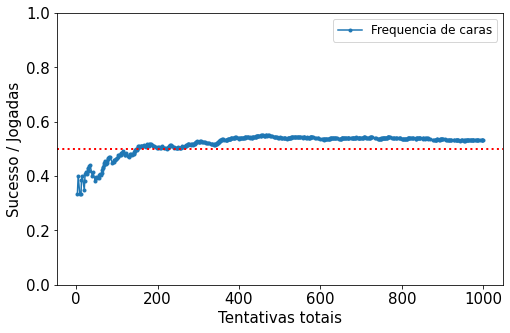

In [3]:
moeda = moedas() #1000 jogadas de moeda de 1/2 probabilidade de cair cara. 
'''
É preciso jogar a função numa variavel pois caso contrario, a cada slice estaremos chamando a função novamente 
e comparando o sucesso e tentativas de casos distintos.
'''
plt.figure(figsize = [8,5])
plt.plot(moeda[1],moeda[0], '.-', label='Frequencia de caras')
plt.legend(fontsize = 12)
plt.ylim(0, 1.0)
plt.ylabel('Sucesso / Jogadas', fontsize=15)
plt.xlabel('Tentativas totais', fontsize=15)
plt.axhline(0.5, color='r', linestyle='dotted', linewidth=2) # ponto de estabilidade
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()   

Aumentando o numero de tentativas e observando a maior estabilidade do gráfico


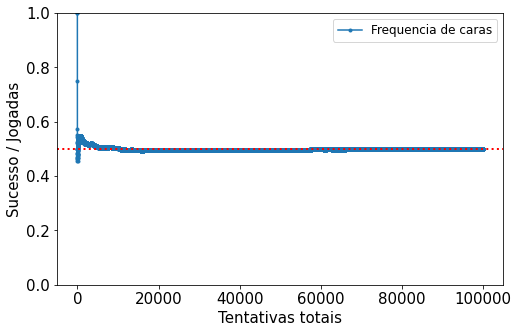

In [4]:
moeda = moedas(probabilidade = 0.5, jogadas = 100000)
'''
É preciso jogar a função numa variavel pois caso contrario, a cada slice estaremos chamando a função novamente 
e comparando o sucesso e tentativas de casos distintos.
'''
plt.figure(figsize = [8,5])
plt.plot(moeda[1],moeda[0], '.-', label='Frequencia de caras')
plt.legend(fontsize = 12)
plt.ylim(0, 1.0)
plt.ylabel('Sucesso / Jogadas', fontsize=15)
plt.xlabel('Tentativas totais', fontsize=15)
plt.axhline(0.5, color='r', linestyle='dotted', linewidth=2) # ponto de estabilidade
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
print('Aumentando o numero de tentativas e observando a maior estabilidade do gráfico')
plt.show()   

> Perceba que o ponto de estabilidade coincide com o que sabemos da probabilidade da moeda dar cara (50%) ao usarmos o conceito clássico de probabilidade no espaço amostral finito uniforme {cara,coroa}.

**O conceito frequentista de probabilidade é mais abrangente do que o clássico**, já que também se aplica em espaço amostral não finito uniforme. No entanto, *embora o conceito frequentista nos forneça uma forma de medir na prática a probabilidade de ocorrência de um determinado evento, sua aplicabilidade também não é tão ampla como gostaríamos*.

Perceba que haverão casos em que poderemos atribuir um valor à probabilidade de algo ocorrer (como o caso da moeda honesta), pois não encontraremos motivos para atribuir maior probabilidade a um evento do que outro. No entanto, haverão outros em que isso não será possível, nos restando apenas a **determinação empírica** desse valor (*tentativa e erro + extrapolar para numeros grandes e ver o ponto de estabilidade*).

Temos também que a soma de todas as probabilidade do espaço amostral tem 100% de ocorrer ($P(\Omega) = 1$). E qualquer probabilidade de algum evento deve girar entre 0 e 1.

- Eventos mutuamente exclusivos:

$P(A ou B) = P(A) + P(B)$

- No caso geral:

Temos que descontar dessa soma a probabilidade de A e B ocorrerem simultaneamente.

$P(A ou B) = P(A) + P(B) - P(A e B)$

**OBS**: 

>Quando não existe dependência entre eventos A e B, podemos usar a regra do *E*:
$P(A e B) = P(A) \times P(B)$

>Quando A e B são eventos *mutamente exclusivos* (não podem ocorrer simultaneamente), podemos usar a regra do *OU*:
$P(A ou B) = P(A) + P(B)$

Esse cálculo surge quando queremos conhecer a chance de ocorrência de um dentre dois acontecimentos. *Se um evento pode ter diferentes resultados possíveis, A,B,C e assim por diante, a possibilidade de que A ou B ocorram é igual à soma das probabilidades individuais de A e B, e a soma de todos os resultados possíveis (A,B,C...) é igual a 1 (100%).* Suṕonhamos que uma funcionária de uma companhia aérea precise supor a probabilidade de que dois passageiros se apresentem para viajar ou de que nenhum deles o faça, nesse caso ela deve somar a probabilidades.  Isso explica a **regra do 'ou'**. 

Perceba também que a **regra do 'e'** serve para os casos em que devemos multiplicar as probabilidades. O que torna crível a regra de *quando dois eventos possíveis A e B são independentes, a probabilidade de que A e B ocorram é igual ao produto de suas probabilidades individuais*, é a lógica. Suponha que uma pessoa casada tenha, em média, uma chance de aproximadamente 1/50 de se divorciar a cada ano. Por outro lado, um policial tem uma chance de aproximadamente 1/5000 de morrer em servuço. Qual a probabilidade de que um policial casado se divorcie e morra no mesmo ano? Obviamente não se trata de eventos independentes, mas perceba que caso fossem, a probabilidade seria simplesmente 1/5000 x 1/50 = 1/250.000 (esse calculo não funciona pois, infelizmente, depois de morrer não há como se divorciar). No entanto, suponha que tenhamos um baralho composto de 100 perfis masculinos de um serviço de relacionamento online. Cada perfil é composto por uma pequena lista de informações, como se é sincero (sim ou não) e bonito (sim ou não). Consideremos um bom candidato a alma gêmea alguém que consiga cumprir com ambas questões. Suponha que 1 de cada 10 perfis tenha 'sim' para cada uma das categorias. Quantos candidatos sobreviverão ao filtro de alma gemea? Bem, se cada 1/10 dos homens são sinceros, 10 dos 100 passarão no teste. Desses 10 homens, quantos serão bonitos? Novamente 1/10. Isso faz com que o resultado final seja 1/100 = 1/10 x 1/10. 

 É extremamente valioso saber a probabilidade da ocorrência de múltiplos eventos. Quais as chances de faltar eletricidade e o gerador não funcionar? Quando os eventos são independentes, a probabilidade de ocorrer ambos é o produto das respectivas probabilidades. A probabilidade de dar três caras seguidas acaba sendo 1/8, a probabilidade de quatro caras é 1/16. Por isso os avisos de cadastro em redes sociais lhe avisa para aumentar a qualidade da sua senha. Uma senha com apenas seis digitos numéricos pode ser calculado por $10^6$, podendo ser facilmente calculado por um computador. No entanto, ao adicionar letras e simbolos em cada digito provavel, temos que cada caracter possui 36 possibilidades, aumentando a quantidade de senhas possíveis para $36^6$.
 
 Se supomos que estejamos interessados na probabilidade de que um evento ocorra ou outro (novamente INDEPENDENTES), teremos que sua probabilidade consiste em sua soma simples. Por exemplo, a probabilidade de dar 1, 2 ou 3 com um único lançamento de dado é a soma das probabilidade individuais 1/6+1/6+1/6 = 1/2.

- A chance de não correr:

$P = 1 - P(A)$



- Condicional e independencia de eventos:


Dado os eventos A e B:

$P(B|A) = \frac{P(AeB)}{P(A)}$ , se P(A) > 0.

Ora, isso faz sentido. Dado que A ocorreu, todo o espaço amostral será composto pelos elementos de A. Não só isso, se A ocorreu, os unicos elementos de B possíveis de acontecer são aqueles que são comuns à A. 

Perceba que caso A esteja contido em B, (A e B) = A, (A ou B) = B, então $P(A|B) = P(A)/P(B)$. $P(B|A) = 1$.

Pela definição de probabilidade condicional temos:

$P(A e B) = P(A|B)\times P(B) = P(B|A)\times P(A)$

Também chamado de **Teorema de Bayes**.

Analisando com atenção o Teorema, vemos que o fato de sabermos que o evento B ocorreu de fato pode alterar nossas expecitativas sobre A e, quando se trata de probabilidades condicionais, ele nos permite inverter a ordem dos condicionamentos. 

Note que se A e B são eventos independentes e tais que P(A) > 0 e P(B) > 0, então P(A|B) = P(A) e P(B|A) = P(B) e, portanto, saber que B ocorreu não altera nossas expectativas nesse caso. 

Vale-se enfatizar que a teoria bayesiana é baseada em probabilidades *a priori* – incondicionais atribuídas a um evento, na **falta de conhecimento ou informação que suporte sua ocorrência ou ausência** – e em *a posteriori* – condicionais de um evento, **devido a alguma evidência**. 

- O caso mais interessante de aplicação deste teorema é o do **diagnóstico de uma doença rara**: 

Perceba que, caso haja uma doença rara tal que afete apenas 0,1% da população, será necessário também um teste para identifica-la. Imagine que o teste possua 99% de precisão, de tal forma que apenas 1% dos testes são incorretos (falso positivo ou falso negativo). O teorema de Bayes nos mostrará que, nesse caso, ter apenas um teste positivado é muito pouco para afirmar que o paciente possui a doença. Isso pois, a quantidade de pessoas que não terão a doença, mas que positivarão (falso positivo), será maior que a quantidade de pessoas doentes e positivadas (verdadeiro positivo). 

Ora, imagine uma população de 10009 pessoas, de forma a termos 10 doentes e 9999 não doentes. Se o teste tem 99% de eficácia for aplicada entre os 9999 saudáveis, 1% receberá o teste positivado, ou seja, cerca de 99,99 pessoas com resultados errados. Enquanto isso, entre os 10 doentes, uma média de 9,9 teriam o resultado positivado (99% de acerto). Isso significa que, dentre todos os que receberam o resultado POSITIVO, a probabilidade de encontrarmos o doente é de 9,9/109,9 $\approx 9$%. 

Perceba que é o mesmo que pedirmos para calcular a probabilidade do paciente estar doente dado que fora positivado num teste de 99% de precisão. Calculo este, previsto pelo teorema de Bayes. 

$P(Doença|Positivo) = \frac{P(D e P)}{P(P)} \approx 9/100$

>> Perceba a importancia de definir a teoria bayesiana em bases a prioristicas na falta de conhecimento empírico. Se fizéssemos um levantamento estatistico de pessoas doentes e saudaveis, não teríamos 99,99 pessoas com testes positivados, muito menos um espaço amostral quebrado como 109,9 pessoas. No entanto, verificaríamos um caso similar àquele visto no calculo probabilistico da moeda. Ou seja, a estatística frequentista se aproximando do cálculo a priori conforme aumentamos a amostra.

 - No geral

Dados eventos A e B no mesmo espaço amostral:

$P(A ou B) = P(A) + P(B) - P(A e B)$

(Quando A e B não tem elementos em comum, P(A e B) = 0). Ora, faz sentido. Se queremos calcular a chance de ocorrer A **ou** B, não queremos considerar a probabilidade de ambos ocorrerem simultaneamente.

A probabilidade também nos possibilita calcular o que pode ser a ferramenta mais útil em toda tomada de decisão: o **valor esperado**. Também chamado de *payoff* de algum evento, se trata da soma de todos os diferentes resultados, cada um pesado pela sua probabilidade. Por exemplo, o preço de um bilhete de loteria é calculado para estar acima do valor esperado, pois assim, em larga escala, a banca vence. Veja:

Suponha que você seja convidado a participar de um jogo que rola um único dado. O prêmio desse jogo é de 1 real se você tirar 1, 2 reais se tirar 2, 3 reais se tirar 3 e assim por diante. Qual o valor esperado para um único lance desse dado? Seguindo o que vimos até aqui, cada resultado possível tendo 1/6 chance de ocorrer, mas cada face terá um peso diferente (seu valor em reais). Portanto:

$1/6 \times (1) + 1/6 \times (2) + 1/6 \times (3) + 1/6 \times (4) + 1/6 \times (5) + 1/6 \times (6) = 21/6 = 3,5$

Isso significa que pagar menos de 3,50 reais para jogar um dado será um bom investimento, afinal, o valor esperado de retorno é 3,50 (em larga escala). O que ocorre nos cassinos e loterias, é que o valor vendido é muito acima do ganho esperado (nesse caso, uma rodada no dado custaria 5 reais). Isso significa que a chance de perda é muito maior que a de ganho, e ao longo do tempo (ou ao longo da quantidade de jogadores) a banca vence. Esse calculo não garante que você irá ganhar ou perder dinheiro jogando um vez, mas ajuda a esclarecer quais são os riscos que valem a pena correr.

E o que significa esse *valor esperado*? Em casos de uma distribuição normal ou variável aleatória, será nossa **média** ou **esperança**.

##### Técnica de contagem

 - Para sabermos calcular a probabilidade de um evento ocorrer se faz necessário saber contar quantos eventos possíveis são capazes de acontecer.
 
Em pequena escala (como jogar *uma* moeda *uma* vez), essa contagem é fácil (cara ou coroa, dois eventos possíveis). Se temos **2 eventos possíveis** e queremos saber apenas **uma possibilidade** (por exemplo, a chance de cair *cara*), partindo do princípio de que não haja nenhum motivo para que um evento seja mais provável que o outro, teremos que nossa probabilidade de tirar cara será p= 1/2 = 50%. Uma possibilidade dentre duas, faz sentido.
 
Em larga escala, porém, se faz necessário contar **todos** os eventos possíveis (no caso da moeda, o total pode ser 2 eventos possíveis elevado a quantidade de jogadas). Se queremos saber, por exemplo, quão provável é de se conseguir tirar *6 caras ao jogar 6 vezes*, é necessário saber **contar** todas as possibilidades de se conseguir *qualquer resultado* em 6 jogadas. Assim, tendo em mente que: 
 
 **(I)** Queremos saber, dentre $2^{N° jogadas} = 2^{6}$ possibilidades, quantas dessas temos 6 caras seguidas, e 
 **(II)** Saber que só há 1 possibilidade; 
 
 Teremos o necessário para calcular nossa probabilidade. $p= 1/2^{6}$.
 
Pode parecer contraintuitivo pensarmos assim, pois, já que os eventos são independentes, poderíamos utilizar a regra do "**E** equivalente à **Vezes**" (vista anteriormente) e chegar no mesmo valor para qualquer possibilidade possivel $ p = 1/2 \times 1/2 \times 1/2 \times 1/2 \times 1/2 \times 1/2 = 1/2^{6}$ = Jogada1 **E** jogada2 **E** Jogada3 **E** Jogada4 **E** Jogada5 **E** Jogada6. Ou seja, a chance de cair 6 caras teria a mesma chance de cair 5 caras e 1 coroa, que teria a mesma chance de cair 4 caras e 2 coroas, e assim por diante. Não parece certo, mas está! 

Bem, está correto, mas não do jeito que está pensando. O calculo acima está correto para qualquer possibilidade **se levarmos em conta a ordem**. O fato dos eventos serem independentes (ou seja, não há motivo para que haja mais chance de cair coroa do que cara, e vice-versa), faz com que a possibilidade de *qualquer* evento seja o mesmo. Mas quando estamos nos questionando **Quão mais provável é cair 3 caras em 6 jogadas do que 6 caras?** não estamos querendo levar em conta a ordem! O que queremos fazer é pegar todas as possibilidades (o que houve 3 caras e 3 coroas, 2 caras e 4 coroas, 4 caras e 2 coroas...) e somá-las em suas devidas 'categorias' (ou seja, a possibilidade de cair *cara, cara, cara, coroa, coroa, coroa* vai se somar com as possibilidades *cara, coroa, cara, coroa, cara, coroa* e assim por diante, e entrar na '**Categoria 3caras, 3coroas**'). É isso que tornará o evento 6 caras mais raro do que o evento 3 caras, o fato de não nos importarmos com as ordens (ou de tratarmos cada moeda como indistinguivel, ou qualquer outra interpretação que se escolha). 

Perceba que contabilizar todas as possibilidades parece um inferno. Teríamos que fazer um 'mapa' de todas as possibilidades possíveis e ir separando-as em categorias, somá-las (a regra do **ou** nos ajudaria nisso), e então só aí teríamos a noção da raridade desses eventos. É aí que entra as técnicas de contagem.

 - Arranjo, permutação, combinação, probabilidades... e termodinâmica?

Se dominamos as técnicas de se contar possibilidades incrivelmente diversas, poderemos chegar até a saber calcular em quantas formas possíveis $ 10^{23} $ partículas de um gás podem se organizar numa sala. 

Quando calculamos um arranjo, estamos atrás da resposta da pergunta "de quantas formas diferentes podemos...?". Veja:

Se temos a nossa disposição os numeros {1,2,3,4,5,6}, podemos nos perguntar "de quantas formas podemos retirar 3 números deste grupo?" E aí, para respondê-la, deveremos pensar "A ordem importa?".

Nesse caso, se retirarmos "123" ou "321" podemos dizer que foram situações diferentes, embora tenham sido escolhidos os mesmos numeros. Nesse caso, em que *a ordem importa*, podemos aprender que:

$_*_*_ {1,2,3,4,5,6} ----> 6*5*4 = 120$

Sendo cada _ referente a quantidade de numeros que podemos considerar como nossa escolha.

Ou seja, na primeira escolha temos 6 possibilidades diferentes. A partir dela, temos 5, depois 4, e assim por diante (no caso, teremos apenas 3 escolhas). Em seguida, podemos usar a regra do **E** (primeira escolha **e** segunda escolha **e** terceira escolha) e multiplicar as possibilidades. Teremos, portanto, 120 possibilidades de escolher 3 numeros . Matemáticamente, isso é o mesmo que fazer o calculo do arranjo:

$
A^{3}_{6} = \frac{6!}{(6-3)!} = 120
$

*Logo darei uma dica para entender essa matemática de forma tão intuitiva quanto a forma acima. Por enquanto sigamos.*

Perceba que, se queremos saber de quantas formas podemos embaralhar estes 6 números, podemos tentar escolher 6 dos 6 numeros e considerar cada ordem como sendo uma possibilidade diferente. Nesse caso teríamos $_*_*_*_*_*_ = 6*5*4*3*2*1 = 6!$. Isso é o que chamamos de *permutação*, que é um caso simplificado de arranjo.

Se queremos construir, por exemplo, uma senha com estes numeros, partiremos do princípio de que podemos repetir números. Ou seja, a partir da nossa escolha (6 possibilidades), nossa segunda escolha ainda terá a mesma quantidade de possibilidades, e a nossa terceira também! Nesse caso teremos $6^{3}$.

Perceba, portanto, que a matemática do arranjo será:

- (I)
$
A^{N_1}_{N} = N^{N_1}
$

- (II)
$
A^{N_1}_{N} = \frac{N!}{(N-N_1)!}
$
- (III)
$
P_N = N!
$

Sendo **(I)** quando queremos saber quantas possibilidades possíveis podemos ordenar $N_1$ elementos escolhidos dentre N *com repetições* possíveis, **(II)** sendo as possibilidades de ordenar $N_1$ elementos escolhidos dentre N *sem repetir* e **(III)** quantas possibilidades podemos ordenar todos os elementos.

Quando pegamos o fatorial de um numero, nesses casos em que contamos alguma coisa, estamos, basicamente, calculando a possibilidade de diferentes ordens possíveis (ou 'embaralhar' nossas opções). Pode-se interpretar a segunda equação como sendo todas as possibilidades de se embaralhar os numeros **{1,2,3,4,5,6}**, retirando-se as possibilidades dos numeros que não escolhemos (estávamos considerando que retirar 123 seria diferente de retirar 321, então *queremos considerar todas suas ordens*, mas os numeros não escolhidos não nos importam, e nem suas ordens. As possibilidades possíveis de reorganizar todos os numeros não escolhidos será $(N-N_1)$!, para retirá-las da contagem, basta dividir).

Quando queremos contar as possibilidades possíveis em que a ordem não importa, podemos dividir nosso calculo por $N_1$! (ou seja, retirar da conta todas as vezes em que os numeros escolhidos estão em ordens diferentes) e aí teremos a formula da técnica de **combinação**:

$
C^{N_1}_{N} = \frac{N!}{(N-N_1)!(N_1)!}
$

Para ilustrar melhor a técnica de combinação, caso ainda não esteja muito claro, suponha que queiramos escolher três letras dentre as opções **{A,B,C,D,E,F}**. Nesse caso, escolher A,B,C será o mesmo que escolher C,A,B e o mesmo que escolher B,C,A e assim por diante. A ordem não importa. Teremos, portanto:

$
C^{3}_{6} = \frac{6!}{3!3!} = 20
$

Ou seja, calculamos quantas possibilidades teríamos em ordenar as letras {A,B,C,D,E,F}, e retiramos desta contagem todas as ordens repetentes possíveis que envolvessem as letras que escolhemos e as que não foram escolhidas. Afinal, a ordem não importa mais. Por isso, o unico termo que adicionamos na equação é a divisão por $N_1$!.

Perceba que, sabendo essa matemática, nossas contagens se tornam mais convenientes. Por exemplo: 

Digamos que jogamos 3 moedas. Agora podemos analisar qual a melhor chance de apostarmos no resultado. Para $N_1 =$ Cara, e $N = 3$ jogadas, temos:

$
C^{0}_{3} = 1
$

$
C^{1}_{3} = 3
$

$
C^{2}_{3} = 3
$

$
C^{3}_{3} = 1
$

O que faz sentido, tendo em vista que sabemos que o total de eventos possíveis será $2^{3} = 8 = 1+3+3+1$.
Ou seja, a chance de cair 1 cara é de 3/8; a chance de cair 3 caras é 1/8. A chance de cair qualquer resultado que não 3 faces iguais será 6/8 = 3/4 !!!

É com base nessas contagens que o estudo da termodinâmica por meio da mecânica estatística se faz possível. Não lhe incomodarei demais com os detalhes, mas veja que será possível calcular, por exemplo, a quantidade de formas possíveis com que *n* partículas se redistribuem em **N** células (considerando que cada célula só pode comportar uma partícula ou ficar vazia):

$
\Omega = \frac{N!}{n!(N - n)!}
$

Sendo que, se as partículas fossem distinguiveis, não haveria motivo para dividirmos por *n*! (suas ordenações passariam a importar), e poderíamos retira-la da equação.

- Triângulo de Pascal:

O triângulo de Pascal (alguns países, nomeadamente na Itália, é conhecido como Triângulo de Tartaglia) é um triângulo numérico infinito formado por números binomiais. Na figura, cortei o triângulo na oitava linha, mas ele poderia se estender para baixo infinitamente. De fato, é bem fácil continuar o triângulo, pois, a não ser pelo 1 no ápice, cada número é igual à soma dos dois números situados à sua esquerda e direita na linha acima (acrescentando um 0 para o caso de não existir número à esquerda ou à direita acima).

<img src = "./Pascal.png" style="width: 500px;"/> 

O triângulo de Pascal é útil sempre que quisermos saber o número de maneiras pelas quais podemos selecionar algum número de objetos a partir de uma coleção que tenha um número igual ou maior de objetos. Eis como funciona no caso dos convidados de um casamento: 

> Devemos encontrar o número de maneiras distintas pelas quais podemos escolher 10 pessoas de um grupo de 100 convidados para organizar as mesas. 

Para isso, podemos descer pelos números na esquerda em azul até chegar na linha 100. O triângulo na figura não chega tão longe, mas, por agora, vamos fingir que chega. O primeira número da linha 100 nos diz o número de maneiras distintas pelas quais podemos selecionar 0 convidados de um grupo de 100 (naturalmente só há uma maneira, selecionando ninguém). Isso é verdadeiro independente do número total de convidados, perceba que todas as linhas começam com 1. O segundo número da linha 100 nos mostra o número de maneiras pelas quais podemos selecionar 1 convidados dentre 100 (naturalmente, há 100 formas diferentes de fazer isso). O terceiro número de cada linha representa número de grupos diferentes de 2 pessoas que podemos formar, e assim por diante. Perceba que se trata do mesmo cálculo que vimos acima (combinação)! 

O número buscado no casamento, portanto, seria o décimo primeiro número da linha 100 (escolher 10 de 100). De fato, quando algum convidado inevitalmente se queixar de seu lugar na mesa, poderemos lembrá-lo do tempo que seria necessário para considerar todas as possibilidades: presumindo que passasse apenas um segundo considerando cada uma delas, precisaríamos de algo em torno de 10 trilhões de anos. 

In [34]:
def pascal_t(m,n):
    '''
    Código com o algoritmo para montar a árvore de Pascal.
    '''
    if m == 0 and n ==0:
        return 1
    elif n == -1 or m == -1:
        return 0
    else:
        return pascal_t(m-1, n-1) + pascal_t(m-1,n)

pascal_t(6,3)

20

Uma vez aprendido o método de Pascal, surgem aplicações por toda parte. Digamos que um colega trabalha em uma _start-up_ de jogos de computador. Ele muitas vezes conta que, embora a diretora de marketing aceitasse a ideia de que pequenos grupos de trabalho devessem chegar somente a "conclusões qualitativas", ainda assim citava decisões apoiadas pela "ampla maioria" (de 4 contra 2, ou 5 contra 1) dos membros de um grupo, como se fosse um resultado significativo. 

No entanto, imaginemos que um grupo de 6 pessoas tenha que examinar e tecer comentários sobre um produto que, na prática, metade da população mundial acharia interessante. Com que precisão essa preferência se refletirá dentro do grupo de trabalho? Nesse caso, a linha relevante é a sexta; ela representa o número de possíveis subgrupos de 0, 1, 2, 3, 4, 5 ou 6 integrantes que poderiam gostar ou não do produto:

>1 | 6 | 15 | 20 | 15 | 6 | 1

Com esses números, vemos que há 20 maneiras pelas quais os integrantes do grupo poderiam se dividir meio a meio, refletindo de forma precisa a visão da população. No entanto, também existem 44 maneiras (1+6+15+15+6+1) pelas quais encontraríamos um consenso não representativo da realidade. Portanto, se não formos cuidadosos, a chance de nos enganarmos é de 44/64 = 68,75%. 

 - Poder das probabilidades. Quando o feitiço pode virar contra o feiticeiro
 
Se você leu até aqui, está bem ciente de como o calculo da probabilidade funciona. Isso significa que algumas imprecisões ficam mais claras de serem compreendidas. Por exemplo, vimos que para esmagadora maioria dos nossos cálculos (se não todos) partiram do princípio de que os **eventos são independentes**. Imagine que estamos trabalhando no gerenciamento de risco de uma companhia aérea. Se a probabilidade de um motor falhar por qualquer motivo é 1/100.000 (não aceitável num universo de milhares de vôos diários), podemos acoplar um segundo motor em cada aeronave. No entanto, seria um erro considerar que o risco agora será de 1/10bi, pois as falhas nos motores não são independentes. Caso a falha ocorra pois um grupo de gansos entrou no caminho e foi puxado, o segundo motor terá probabilidade similar ao primeiro de falhar, e o mesmo vale para qualquer outro fator possível. Ou seja, dado que um motor falhe, a probabilidade do segundo falhar é significativamente maior que a probabilidade deles falharem individualmente. 

Além do erro em **não reconhecer quando eventos não são independentes**, há o de **não reconhecer quando são**. E isso ocorre muito em cassinos e jogos de azar no geral. Apesar da probabilidade da bolinha da roleta cair no preto seja de **16/38** (e **6/38** de cair branco e 16/38 de cair vermelho), caso a bolinha tenha caído no vermelho cinco vezes seguidas, é comum jogadores pensarem "*então a probabilidade de cair preto agora é maior, chegou a hora*". No entanto, a probabilidade de cair no preto permanece inalterada (16/38). O mesmo ocorre no caso da moeda, que vimos ao longo desse material. Se estamos jogando uma moeda de forma frequente, e acabamos vendo 5 caras seguidas, a chance de dar cara na proxima jogada permanece 1/2. O que torna isso pouco intuitivo é o raciocinio das contagens que acabamos de ver (de fato, vimos que se jogarmos uma moeda 5 vezes e contarmos o resultado, a probabilidade de contarmos 2~3 caras será maior do que a de contarmos 5 caras seguidas; mas isso nada tem a ver com o problema "*dado que houve 5 caras seguidas, qual a probabilidade de cair coroa na proxima*". Quando fazemos essa pergunta, estamos tratando de um universo de 6 jogadas, mas estamos jogando fora, automaticamente, todas as possibilidades que não englobem 5 caras seguidas e, no fim, restam apenas duas possibilidades que são igualmente possíveis, 5 caras seguidas e 1 coroa ou 6 caras seguidas).

Portanto, o recado de fica é: **se atente a independencia dos eventos!**

##### Variáveis aleatórias

Conhecer as chamadas **variáveis aleatórias** é uma boa idéia se você procura fundamentar ainda mais a matemática dos problemas. É por meio desse conhecimento que você poderá explorar problemas como a de *um aluno que queira chutar questões numa prova e saber a chance de passar*, ou para *uma funcionária que queira estimar a quantidade de mensagens recebidas no e-mail enquanto esteve fora do expediente*, ou até de *um trabalhador que queria saber qual a chance de gastar no máximo 30 minutos durante sua espera ao ônibus*.

Nesses casos, a variável aleatória pode ser expressa por:

$X = $ numero de mensagens no e-mail ou tempo em minutos esperado...

Esse tipo de variável pode ser classificada entre **discretas** (valores assumidos são reais e atribuidos a alguma probabilidade, geralmente num processo de contagem. Ou seja, cada possibilidade é fixa e podemos saber sua probabilidade.) e **contínuas** (em que sua probabilidade depende de um intervalo, geralmente oriundos de uma medição. Ou seja, se queremos saber a probabilidade de encontrarmos 1 ponto em uma reta, o calculo convencional não fará sentido pois teremos infinitos pontos totais. Nesses casos, é preciso comparar espaços por espaços; intervalos por intervalos). 

Em cada caso, não é possível prever com exatidão qual valor será assumido pela variável. No entanto, será possível fazer afirmações probabilísticas sobre seu comportamento.

> A descrição dos valores que a variável aleatória pode assumir juntamente com a probabilidade de ela assumir cada valor é o que chamamos de **distribuição de probabilidade**!

>Uma variável aleatória (v.a.) é, portanto, uma função que associa cada elemento de um espaço amostral a um número real.

 Não é difícil perceber que há um problema quando se trata de trabalhar com tal tipo de variável. Apesar de entendermos que a variável aleatória serve apenas para mapear o espaço amostral (e, portanto, nos permite trabalhar com probabilidades de forma mais simples), tais definições ainda são muito abstratas. Perceba que quando falamos de uma variável aleatória do tipo "vida útil de uma lâmpada", não se envolve uma fórmula direta que nos permita calcula-la. Ou seja, não podemos performar uma análise quantitativa sobre isso. Por isso, trabalhar com espaços é útil, por exemplo, podemos ir atrás da probabilidade de uma lâmpada durar até 1 ano, e isso é possível obter modelando os dados. 
 > Cuidado, probabilidade e densidade de probabilidade são coisas diferentes!

A variável aleatória irá carregar os mesmos conceitos vistos anteriormente, tendo uma **média** (ou *esperança*), uma **variância** (média ponderada dos quadrados das diferenças... ou simplesmente o desvio padrão ao quadrado), e um **desvio-padrão**, já visto anteriormente.

O coeficiente de variação de uma variável aleatória discreta será o quociente entre DP e a média (esperança):

$CV = \frac{DP}{E}$

As principais formas de trabalhar com variáveis aleatórias discretas são através de modelos, que iremos explorar mais no próximo capítulo.

A probabilidade nos fornece ferramentas para lidar com *incertezas*. Você não deve jogar na loteria, deve investir no mercado de ações apenas para longo prazo, deve adquirir seguro para algumas coisas e não para outras. A probabilidade pode nos ajudar a maximizar ganhos em programas de jogos, ou em estimar com mais clareza a medida de algum corpo celeste. 

Dito isso, a **probabilidade não é determinista**. Não se deve comprar bilhetes de loteria, mas ainda há a chance de ganhar dinheiro se o fizer. 



- Vejamos alguns casos em que a probabilidade e o uso da programação pode nos mostrar o que esperar de situações em larga escala. Podemos simular diferentes possibilidades e guardar cada informação para termos um panorama geral do problema.

### Exemplo 1

Temos N bolas vermelhas e M bolas brancas na urna. Sabemos que N + M = 10.

Tirei e recoloquei 5 bolas da urna (T = 5), destas, obtive 3 bolas vermelhas (R = 3).

Qual a probabilidade de termos N bolas vermelhas na urna?

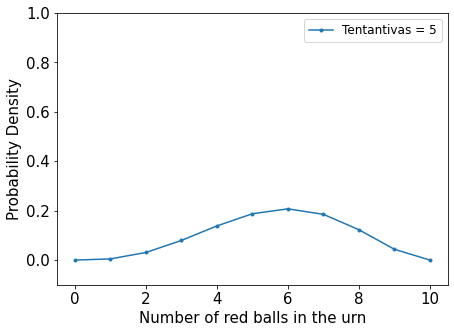

In [5]:
N = np.arange(0,11) # Quantas bolas vermelhas existem na urna
M = 10 - N # Dado que sei quantas bolas vermelhas existem, quantas brancas existem

plt.figure(figsize=[7,5])
T = 5 # bolas TOTAIS retiradas (qualquer cor)
R = 3 # Bolas VERMELHAS retiradas
prob = (((N/(N + M))**R) * (M/(N + M))**(T - R)) # probabilidade 
plt.plot(N, prob/(prob.sum()), '.-', label='Tentantivas = {}'.format(T))
plt.legend(fontsize = 12)
plt.ylim(-0.1, 1.0)
plt.ylabel('Probability Density', fontsize=15)
plt.xlabel('Number of red balls in the urn', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

*Aumentando os valores de 10 ou 100 vezes, o que ocorre?*

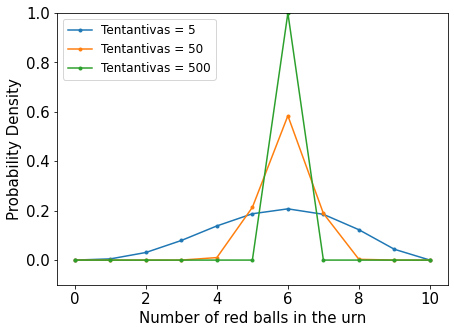

In [6]:
N = np.arange(0,11)
M = 10 - N

plt.figure(figsize=[7,5])
for factor in [1,10,100]:
    T = 5*factor
    R = 3*factor
    prob = (((N/(N + M))**R) * (M/(N + M))**(T - R))
    plt.plot(N, prob/(prob.sum()), '.-', label='Tentantivas = {}'.format(T))
plt.legend(fontsize = 12)
plt.ylim(-0.1, 1.0)
plt.ylabel('Probability Density', fontsize=15)
plt.xlabel('Number of red balls in the urn', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

 - Quantas tentativas precisamos para ter 100% de certeza?

1075.0


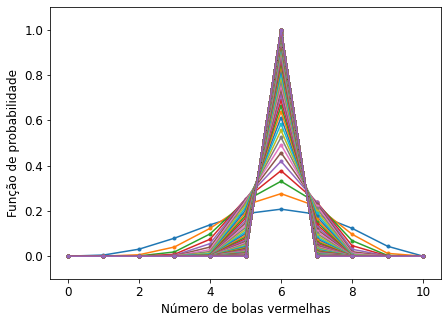

In [7]:
N = np.arange(0,11,1)
M = 10. - N

#print(N)
plt.figure(figsize=[7,5])

for factor in np.arange(1,1000):
    T = 5.*factor
    R = 3.*factor

    prob = ((N/(N+M))**R) * ((M/(N+M))**(T-R))
    prob_norm = prob/prob.sum()

    plt.plot(N, prob_norm, '.-', label='Tentativas = {:02.0f}/{:3.0f}'.format(R,T))
    if len(np.where(prob_norm == 1.0)[0] != 0):
        print(T)
        break
plt.ylim(-0.1, 1.1)
plt.xlabel('Número de bolas vermelhas', fontsize=12)
plt.ylabel('Função de probabilidade', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#pl.legend(fontsize=12)
plt.show()

### Exemplo 2

Antes de 1987, quatro supernovas foram observadas a olho nu em 10 séculos. 

Qual seria a probabilidade de uma supernova ser observada a olho nu no século XX?

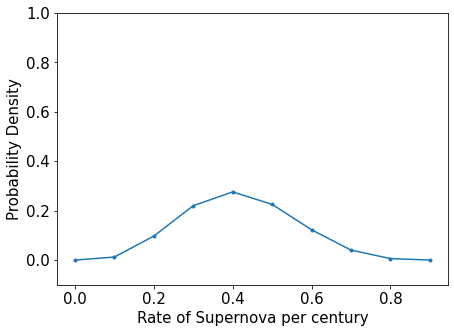

In [8]:
rate = np.arange(0, 1, 0.1)
obs = 4
time_span = 10

prob = (rate**obs) * ((1 - rate)**(time_span - obs))

plt.figure(figsize=[7,5])
plt.plot(rate, prob/(prob.sum()), '.-')
plt.ylim(-0.1, 1.0)
plt.ylabel('Probability Density', fontsize=15)
plt.xlabel('Rate of Supernova per century', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 4)
## Distribuições e Teorema do Limite Central

Quando trabalhamos com probabilidades em larga escala, invariavelmente passamos a trabalhar com *distribuições* (haverá um comportamente padrão conforme mais repetições vão sendo feitas). 

Vejamos os casos mais comuns de distribuições de variáveis discretas:

    (1) Modelo Bernoulli: modelo adequado para experimentos aleatórios em que o espaço amostral consta de somente dois resultados 'sucesso' e 'fracasso'. 
    
Ou resulta em p, ou (1-p). 

$E(x) = p$;

$Var(x) = p(1-p)$;

$DP = \sqrt{p(1-p}$;

$CV = \frac{1-p}{p}$;

    (2) Modelo binomial: basicamente o modelo bernoulli replicado várias vezes. 
    
$P = \frac{N! p^n (1-p)^{N-n}}{n!(N - n)!}$

Probabilidade de um evento ocorrer n vezes em N tentativas

    (3) Modelo Poisson: basicamente o modelo binomial no limite em que N vezes vai ao infinito e a probabilidade de cada vez vai à zero, de forma que a média P*N vira uma constate.

N $\longrightarrow  \infty $ e $P*N \longrightarrow \lambda$ tal que $\lambda$ é uma constante.  

Irei manipular o P da binomial rapidamente, multiplicando tudo por (N/N) tal que:

$P = \frac{N!}{n!(N-n)!} * p^n (\frac{N}{N})^n *(1-\frac{N}{N}p)^{N-n}$

Escrevendo deste modo, podemos ler $P*N$ como nossa média constante. Não só isso, podemos simplificar a combinação da seguinte maneira:

$\frac{N(N-1)(N-2)...(N-n)!}{n!(N-n)!} = \frac{N(N-1)...(N-n+1)!}{n!}$

tornando $P = \frac{N(N-1)...(N-n+1)}{n!} \frac{1}{N^n} (PN)^{n} (1 - NP/N)^{N-n}$

Perceba que nosso primeiro numerador pode ser escrito como $(N-0)(N-1)...(N-n+1)$, tendo, portanto, $n$ multiplicações (de 0 a n+1), ao passo que temos $N^n$ logo abaixo. Portanto:

$P = [1(1-1/N)...(1-(n+1)/N)]\frac{1}{n!} (PN)^n (1-NP/N)^{N-n}$

Para $\lambda = NP$ e sabendo que $e := \lim_{x\rightarrow \pm \infty} (1+1/x)^x$ e $\lim_{N \rightarrow \infty} [1(1-1/N)...(1-(n+1)/N)] \longrightarrow 1$:

$P = [1(1-1/N)...(1-(n+1)/N)]\frac{1}{n!} \lambda^{n} (1 - \lambda/N)^{N-n}$


$P \longrightarrow 1*\frac{1}{n!}\lambda^{n}e^{-\lambda}$.

Sendo esta a equação que define a distribuição de Poisson.

In [9]:
## Plots explorando os modelos. 

In [10]:
## escrever sobre as distribuições de Poisson e outros... Depois de passar a matemática deles, deixar os gráficos abaixo. 

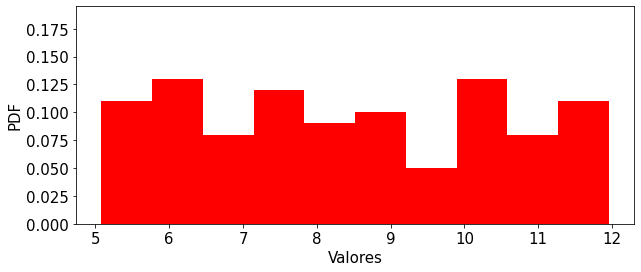

In [11]:
# Criando distribuição uniforme aleatória (valores entre 5 e 12) e plotando a distribuição
bins = 10

distribuicao = np.random.uniform(low=5, high=+12, size=100)

value, binedge = np.histogram(distribuicao, bins=bins)

plt.figure(figsize=[10,4])
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=1.0*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylim(0, 1.5*np.max(value/np.sum(value)))
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valores',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

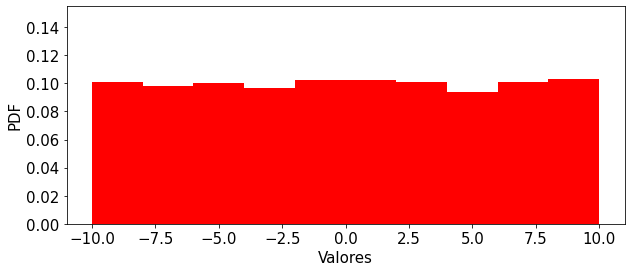

In [12]:
bins = 10

distribuicao = np.random.uniform(low=-10, high=+10, size=10000)

value, binedge = np.histogram(distribuicao, bins=bins)

plt.figure(figsize=[10,4])
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=1.0*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylim(0, 1.5*np.max(value/np.sum(value)))
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valores',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

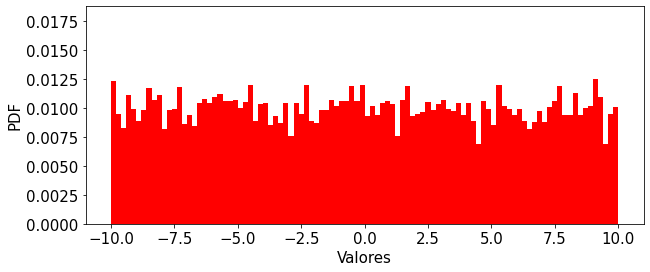

In [13]:
bins = 100

distribuicao = np.random.uniform(low=-10, high=+10, size=10000)

value, binedge = np.histogram(distribuicao, bins=bins)

plt.figure(figsize=[10,4])
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=1.0*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylim(0, 1.5*np.max(value/np.sum(value)))
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valores',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

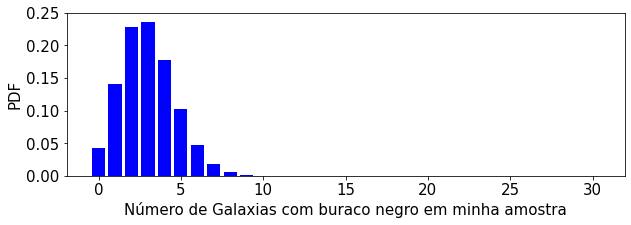

In [14]:
## Distribuição Binomial
import scipy.special as sp

p = 0.1   # probabilidade de sucesso, valores da minha amostra 1.
q = 1 - p # probabilidade de falha.

N = 30    # número de "tentativas", número de objetos estudados na minha amostra 2.

i = np.arange(0, N+1, 1)

pdf = (p**i) * (q**(N - i)) * sp.factorial(N) / (sp.factorial(i)*sp.factorial(N - i))

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(i, pdf/pdf.sum(), color='blue', width=0.8)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Número de Galaxias com buraco negro em minha amostra',fontsize=15)
plt.yticks(np.arange(0, 0.3, 0.05),fontsize=15)
plt.xticks(fontsize=15)
plt.show()

 - E se fizermos uma distribuição randômica?

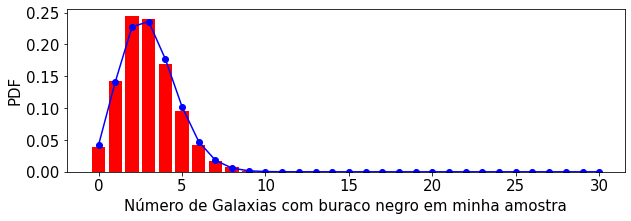

In [15]:
p = 0.1   # probabilidade de sucesso, valores da minha amostra 1.
q = 1 - p # probabilidade de falha.

N = 30    # número de "tentativas", número de objetos estudados na minha amostra 2.

i = np.arange(0, N+1, 1)
pdf = (p**i) * (q**(N - i)) * sp.factorial(N) / (sp.factorial(i)*sp.factorial(N - i))

distribuicao = np.random.binomial(n=30, p=0.1, size=1000)
value, binedge = np.histogram(distribuicao, bins=i)


plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(i, pdf/pdf.sum(), 'bo-')
plt.bar(binedge[:-1], value/np.sum(value), width=0.8*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Número de Galaxias com buraco negro em minha amostra',fontsize=15)
plt.yticks(np.arange(0, 0.3, 0.05),fontsize=15)
plt.xticks(fontsize=15)
plt.show()

É possível simularmos numeros aleatórios que sigam uma densidade de probabilidade conhecida. É uma boa forma de modelarmos os dados que detectamos em nossa pesquisa.

### Distribuição de Poisson

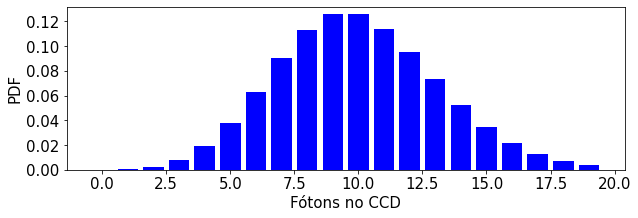

In [16]:
time = 5

mi = 2 * time

n = np.arange(0, mi*2.0, 1.0)

pdf = ((mi**n)/(sp.factorial(n)))*np.exp(-mi)

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(n, pdf/np.sum(pdf), color='blue', width=0.8)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Fótons no CCD',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Distribuição Normal

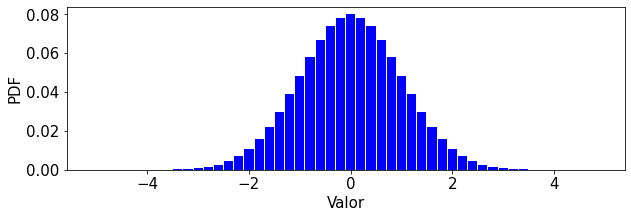

In [17]:
mu = 0.0
sigma = 1.0

n = np.arange(-5, 5, 0.2)

pdf = (1./(sigma*np.sqrt(2*np.pi))) * np.exp(((-1/(2*(sigma**2)))*((n - mu)**2)))

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(n, pdf/np.sum(pdf), color='blue', width=0.18)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

 - Distribuição randômica

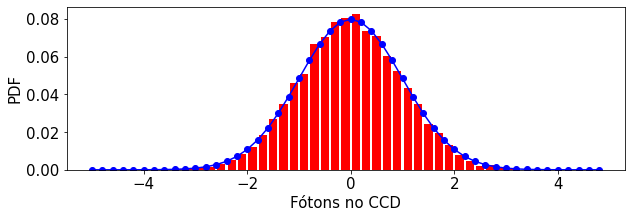

In [18]:
mu = 0.0
sigma = 1.0

n = np.arange(-5, 5, 0.2)

pdf = (1./(sigma*np.sqrt(2*np.pi))) * np.exp(((-1/(2*(sigma**2)))*((n - mu)**2)))

distribuicao = np.random.normal(loc=mu, scale=sigma, size=10000)
value, binedge = np.histogram(distribuicao, bins=n)


plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(n, pdf/np.sum(pdf), 'bo-')
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=0.8*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Fótons no CCD',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

 - Calculando a probabilidade num intervalo

Probabilidade entre (mu - sigma) e (mu + sigma) = 0.681


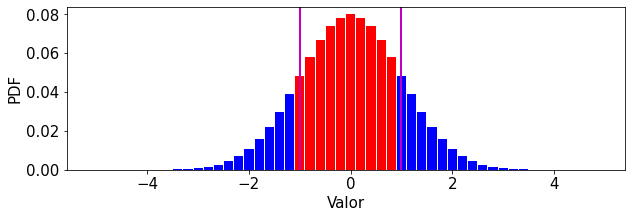

In [19]:
mu = 0.0
sigma = 1.0

n = np.arange(-5, 5, 0.2)

pdf = (1./(sigma*np.sqrt(2*np.pi))) * np.exp(((-1/(2*(sigma**2)))*((n - mu)**2)))

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(n, pdf/np.sum(pdf), color='blue', width=0.18)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.axvline(mu - sigma, color='m', lw=2)
plt.axvline(mu + sigma, color='m', lw=2)

probabilidade = 0
for i in range(len(n)):
    if (n[i] > mu - sigma) * (n[i] < mu + sigma): #Podemos mudar +-2sigma para termos  95% ou +-3sigma para 99%...
        plt.bar(n[i], pdf[i]/np.sum(pdf), color='red', width=0.18)
        probabilidade += pdf[i]/np.sum(pdf)

print(r'Probabilidade entre (mu - sigma) e (mu + sigma) = {:.3f}'.format(probabilidade))
plt.show()

### Teorema do limite central

Às vezes, a estatística parece mágica! 

Somos capazes de tirar conclusões generalistas e poderosas a partir de dados relativamente escassos. De algum modo podemos adquirir uma percepção significativa de uma eleição presidencial meramente falando ao telefone com mil eleitores. Podemos testar cem peitos de frango em busca de salmonela numa fábrica de processamento de aves e concluir, com base apenas nessa amostra, se a fábrica é inteiramente segura. 

*De onde vem esse poder?*

O teorema do limite central será nossa principal fonte de poder para essas análises (as que envolvem o uso de uma amostra para inferir algo acerca de uma população grande). Esses tipos de inferência podem parecer místicos, mas na verdade são apenas uma combinação de duas ferramentas: **probabilidade** e **amostragem adequada**.

Suponha que estamos em busca de um onibus comum que desapareceu em meio a seu trajeto de praxe. Durante a sua investigação, você encontra um onibus enguiçado em meio a uma estrada deserta. Se você entende que, ao olhar para os passageiros (a média de idade, ou a média de peso) é possível inferir que não se trata do onibus procurado (digamos que se trate de um ônibus escolar, teremos uma média de idade muito menor que o esperado), então você entende a ideia básica do terorema.

O princípio essencial é que uma amostra grande, adequadamente escolhida, remeterá à população da qual foi retirada. Evidentemente haverá variações entre uma amostra e outra (por exemplo, cada ônibus terá uma idade média um pouco diferente, tendo em vista que terá uma mistura de passageiros ligeiramente diferente), mas a probabilidade de que qualquer amostra se desvie enormemente da população subjacente é muito baixa.

Essa lógica que nos possibilitou concluir que não se tratava do onibus perdido, já que a chance de um onibus comum possuir uma idade média próxima dos 13 anos é muito baixa. Você pôde concluir isso com um grau razoável de confiança. Sim, podíamos estar errados, mas a probabilidade nos diz que a maioria das vezes estaremos certos.

*Mas quantas vezes?*

O teorema central do limite nos possibilita fazer as seguintes inferências:

    - Se tivermos informações detalhadas sobre alguma população, então podemos fazer inferências poderosas sobre qualquer amostra adequadamente extraída dela. 
    - Se tivermos informações detalhas sobre uma amostra extraída de modo adequado (média e desvio padrão), podemos fazer inferências surpreendentemente acuradas sobre a população.
    - Se tivermos dados que descrevem uma amostra particular, e dados sobre uma população particular, podemos inferir se a amostra é consistente ou não com uma amostra com probabilidade de ter sido tirada dessa população. 
    - Por fim, se soubermos as características subjacentes de duas amostras, podemos inferir se ambas foram provavelmente tiradas ou não da mesma população. 

 - Vejamos o que ocorre quando coletamos qualquer tipo de dados:

##### Dados aleatórios numa distribuição uniforme

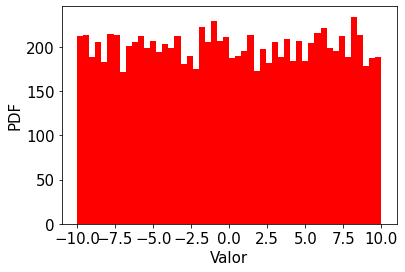

Média da distribuição: -3.4207923870875456


In [20]:
distribuicao = np.random.uniform(low=-10, high=+10, size=10000) 
#Distribuição aleatória e uniforme
plt.hist(distribuicao, color='red', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print ('Média da distribuição: '+str(distribuicao[np.random.randint(0, 10000, 2)].mean()))

A forma da distribuição uniforme vai mudando conforme pegamos a média alguns pares de seus elementos. A distribuiçãobuição dessas médias terá uma forma interessantemente proxima ao de uma gaussiana.

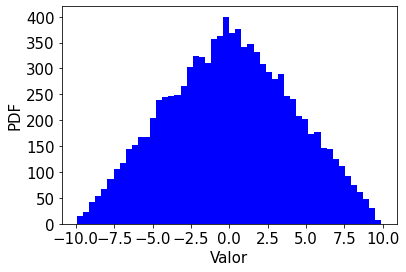

In [21]:
nova_distribuicao = np.array([])

n = 2

for i in range(10000):
    indices = np.random.randint(0, 10000, n)
    nova_distribuicao = np.append(nova_distribuicao, distribuicao[indices].mean())

plt.hist(nova_distribuicao, color='blue', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Se ao invés de pegarmos pares, pegarmos centenas de elementos e calcularmos sua média, aos poucos formaremos uma distribuição cada vez mais próxima de uma gaussiana!

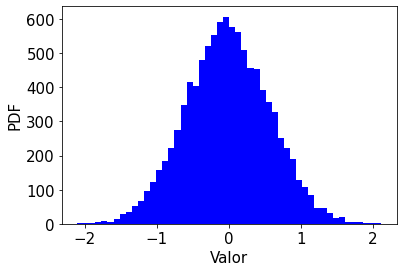

In [22]:
nova_distribuicao = np.array([])

n = 100 #para n muito maior

for i in range(10000):
    indices = np.random.randint(0, 10000, n)
    nova_distribuicao = np.append(nova_distribuicao, distribuicao[indices].mean())

plt.hist(nova_distribuicao, color='blue', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Aumentando a quantidade de dados, a distribuição vai ganhando mais forma.
O mesmo ocorre para distribuições não lineares. 

##### Dados aleatórios numa distribuição exponencial

Perceba que, apesar de se tratar de dados que obedecem uma distribuição exponencial, a distribuição de suas médias voltam a ter a forma de gaussiana.

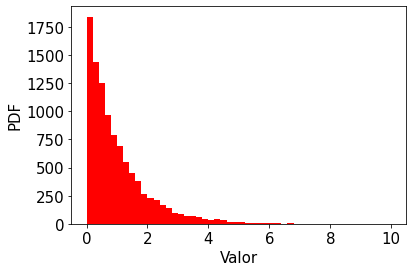

In [23]:
distribuicao = np.random.exponential(scale=+1, size=10000)

plt.hist(distribuicao, color='red', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

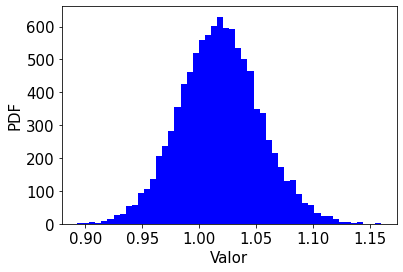

In [24]:
nova_distribuicao = np.array([])

n = 1000 #tente alterar esse numero e verificar o quanto a forma de sino de aproxima para n>>>

for i in range(10000):
    indices = np.random.randint(0, 1000, n)
    nova_distribuicao = np.append(nova_distribuicao, distribuicao[indices].mean())

plt.hist(nova_distribuicao, color='blue', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# 5)
## Correlações e Métodos

Imagine que uma noite de observação, um astrônomo queira analisar os dados obtidos (arquivo_1.dat). Esses dados são referentes ao fluxo de luz de duas estrelas que foram medidas simultaneamente em um mesmo conjunto de 100 frames (digamos Estrela A e Estrela B).

Tendo isso em mente, poderíamos nos fazer algumas perguntas:

*Existe correlação entre estas duas estrelas?*

*Qual a probabilidade desta correlação ser real?*

*Se, por um acaso, houve uma observação na noite anterior dessas duas mesmas estrelas em um conjunto de 87 imagens (arquivo_2.dat), qual a probabilidade destes dois conjuntos de dados tenham como origem a mesma distribuição (qual o grau de confiança dessa observação)?*

A correlação mede o grau em que dois fenômenos estão relacionados entre si. Duas variáveis tem correlação positiva se uma variação numa delas é associada a uma variação da outra no mesmo sentido, e uma correlação será negativa se o oposto ocorre. Vejamos o quão disperso é o fluxo de ambas as estrelas:

In [25]:
df_1 = pd.read_csv('arquivo_1.dat', header = 1, delim_whitespace=True) #Data Frame da primeira observação
df_1 = pd.DataFrame(data = df_1.values,columns = ['Estrela A', 'Estrela B'])
df_1.describe()

,Estrela A,Estrela B
count,100.000000,100.000000
mean,138.989146,201.541003
std,25.414835,26.192340
min,71.011480,132.826179
25%,124.417016,184.757203
50%,139.690902,203.802690
75%,156.359194,219.714019
max,201.424672,262.348418


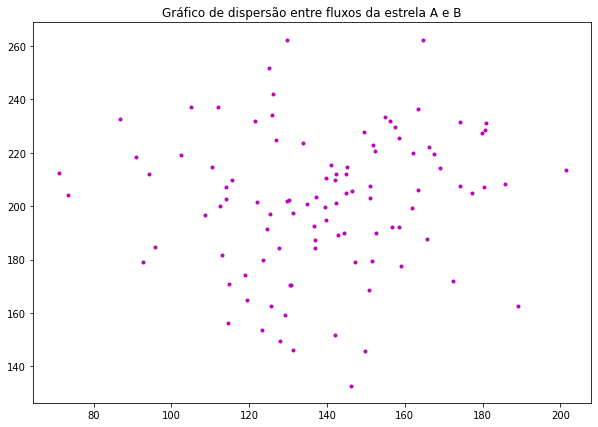

In [26]:
plt.figure(figsize = [10,7])
plt.title('Gráfico de dispersão entre fluxos da estrela A e B')
plt.plot(df_1['Estrela A'], df_1['Estrela B'],'m.') 
plt.show()

Observamos que trabalhar com um padrão constituido de pontos dispersos numa tela é um tanto inconveniente. Em vez disso, podemos utilizar o poder da correlação como ferramenta estatística para encapsular uma associação entre duas variáveis numa única estatística descritiva: **O coeficiente de correlação**.

Este coeficiente se trata de um número único que varia de -1 a +1. Uma correlação de 1 será uma correlação perfeita, enquanto -1 será uma correlação perfeitamente inversa. Quanto mais proximo de 1 ou -1, mais forte a associação. Para esse caso, usarei *Coeficiente de Kendall*, $τ$, que mede o como uma variável aumenta enquanto outra variável também aumenta, sem exigir que o aumento seja representado por uma relação linear.

> **Pearson**:  Paramétrico! Tende para uma distribuição t quando temos duas distribuições normais.

> **Spearman**: Não paramétrico! Tende para uma distribuição t para N grandes. Ao contrário do coeficiente de Pearson, o coeficiente de Spearman não exige a suposição de que a relação entre as variáveis seja linear, nem requer que as mesmas sejam quantitativas – pode inclusive ser utilizado para verificar relação entre variáveis medidas no nível ordinal.

> **Kendall**: Não paramétrico! Tende mais rapidamente para uma distribuição t para N intermediários (preferível). Uma vantagem de tau sobre o coeficiente de Spearman é a possibilidade de ser generalizado para um coeficiente de correlação parcial.

> **OBS:** Uma característica atraente do coeficiente de correlação é que ele não está ligado a nenhuma unidade. Podemos calcular a correlação entre altura e peso - mesmo que a altura seja medida em centímetros e o peso em quilogramas.

In [27]:
x_1 = df_1['Estrela A']
y_1 = df_1['Estrela B']

In [28]:
tau_11, p_value_11 = stats.kendalltau(x_1,y_1)
print('tau = '+str(tau_11)) #Conferir resultado de tau.
print('A probabilidade de haver correlacao: '+str(1 - p_value_11))

tau = 0.098989898989899
A probabilidade de haver correlacao: 0.8555111790224474


>>**OBS**: Atenção. O p_value calculado na função stats utiliza como base o 'null hypothesis is an absence of association'. Ou seja, o calculo é considerando **H0** = **não há correlação**. Isso significa que p_value será a probabilidade de **não** haver correlação. O tau estar baixo significa que a correlação é fraca, mas isso não quer dizer que a probabilidade também seja. Nesse caso, identificamos uma correlação, mas ela é fraca. 

A partir daqui se faz necessário explorar a inferência estatística e uma de suas ferramentas mais famosas, o **teste de hipóteses.**

 A estatística por sí só não prova nada; em vez disso, usamos inferência para aceitar ou rejeitar explicações com base na sua relativa probabilidade. Qualquer inferência estatística começa com uma hipótese nula implícita ou explícita. Essa é nossa premissa de partida, que será rejeitada ou não com base na nossa análise subsequente. 
 
 Se rejeitamos a *hipótese nula*, então geralmente aceitamos alguma hipótese alternativa que seja mais consistente com os dados observados. 
 
 > Por exemplo, no tribunal a hipótese nula H0 é a de que o réu é inocente.
 
Geralmente queremos provar a *Hipótese alternativa* **H1**, enquanto batemos na *Hipótese nula* **H0**. Note que a hipótese nula e a hipótese alternativa são completamente lógicas e, se uma é verdadeira, a outra não é. Se rejeitamos uma afirmação, devemos aceitar a outra.

> Nem sempre provamos a H0, podendo significar apenas que H1 está equivocada ou que as hipóteses não servem para o grupo de dados escolhidos. Em todo caso, é mais seguro afirmar apenas que, *com base nos dados coletados, meramente falhamos em rejeitar H0*.

Geralmente usamos o valor de 5% como limiar mais comum utilizado nas inferências estatísticas. Essa probabilidade é conhecida como *nível de significância* e representa o limite superior para a probabilidade de observação de algum padrão de dados se a hipótese nula fosse verdadeira. Ou seja, podemos rejeitar **H0** no nivel 0.05 se houver uma chance menor do que 5% de obter um resultado no mínimo tão extremo quanto o que observamos se a hipótese nula fosse verdadeira. 

Em outras palavras, se a chance de **H0** ser verdadeira, seguindo os dados coletados, for de 5% ou menos, rejeitaremos ela e aceitaremos **H1**.

- Quanto a comparação da estrela A e B da mesma observação, diremos que:

**H0** : pertencem a mesma distribuição.
**H1** : são objetos totalmente distintos.

Queremos 5% seja a probabilidade dos nossos dados serem referentes ao **H0** caso ela seja verdadeira, importante definir isso previamente para que não haja viés.

Se não chegarmos nesse valor, não poderemos afirmar que **H0** é mentira (lembre do que discutimos antes). 
Ou seja, se os dados se referem a **H0** em apenas 5% ou menos das vezes, ja assumimos que **H1** estará correto. Se as hipóteses foram bem construídas (ou é uma, ou é outra), nossa decisão estará correta em 95% das vezes.


O que chamamos de *p_value* é a probabilidade específica de obter um resultado no mínimo tão extremo quanto o observado caso **H0** fosse verdadeira.

No nosso caso, a probabilidade das estrelas A e B da primeira observação não fazerem parte da mesma distribuição será:

In [29]:
print(str((round(p_value_11*100,2)))+'%')

14.45%


 - Fazendo para os dados coletados na segunda observação (se são, de fato, as mesmas estrelas, teremos uma correlação fraca entre elas também).

In [30]:
df_2 = pd.read_csv('arquivo_2.dat', header = 1, delim_whitespace=True) #Data Frame da segunda observação
df_2 = pd.DataFrame(data = df_2.values,columns = ['Estrela A', 'Estrela B'])
x_2= df_2['Estrela A']
y_2=df_2['Estrela B']
tau_22, p_value_22 = stats.kendalltau(x_2,y_2)
print('tau = '+str(tau_22))
print('A probabilidade de haver correlacao (H0 rejeitada): '+str(1 - p_value_22))

tau = 0.07297514033680833
A probabilidade de haver correlacao (H0 rejeitada): 0.6830945818907175


In [31]:
df_2.describe()

,Estrela A,Estrela B
count,87.000000,87.000000
mean,132.255606,194.484118
std,26.561849,24.340571
min,62.577636,143.982292
25%,117.814211,176.610733
50%,134.793448,196.219248
75%,151.544973,207.845813
max,182.074902,256.714477


Ou seja, percebemos baixa correlação entre as estrelas A e B de ambas as observações, mas elas definitivamente possuem correlação entre si. Isso vai de encontro com o que sabíamos, tendo em vista que são observações dos mesmos objetos. 
Perceba que a menor correlação para o caso da segunda observação pode ser explicada pelo fato de haver sido captado algum fenômeno atmosférico que tenha afetado mais uma estrela que outra (por exemplo, passagem de nuvens que as ofuscam de forma equivalente), ou algum ruído do instrumento. De qualquer forma, se trata de uma observação diferente, e é de se esperar que a correlação detectada seja diferente também.

 - **t-student** e **f-test**:

  A *distribuição t de Student* é uma distribuição de probabilidade absolutamente contínua e simétrica, que nos servirá para comparar a média dos dados coletados (que segue distribuição Normal) numa hipótese inicial (**H0**). Funciona mesmo em casos em que não se sabe qual é a média ou o desvio padrão da população, contanto que ela seja normal. 

   Um *teste F* é qualquer teste estatístico no qual a estatística de teste tem uma distribuição F (uma distribuição de probabilidade contínua) sob a hipótese nula, baseando-se na sua variancia. É mais frequentemente usado ao comparar modelos estatísticos que foram ajustados a um conjunto de dados, a fim de identificar o modelo que melhor se ajusta à população da qual os dados foram amostrados. Por exemplo, este teste é util para estudar a hipótese de que as médias de um determinado conjunto de populações normalmente distribuídas, todas com o mesmo desvio padrão, são iguais, por meio da análise de *variância*. 

In [32]:
def tstudent(x,y):
    '''
    recebe dois data frames e retorna o valor do t e o grau de liberdade
    '''
    ux = x.mean()
    uy = y.mean()
    n = len(x)
    m = len(y)
    v = n + m - 2 ##nesse caso estamos comparando apenas dois tipos de dados, entao nosso grau de liberdade terá - dois
    s = np.sqrt((n*(x.std()**2) + m*(y.std()**2))/v)
    return (ux - uy)/(s*np.sqrt(m**(-1) + n**(-1))),v

def f_test(x,y):
    '''
    recebe dois data frames e retorna o valor do f e o grau de liberdade
    '''
    ux = x.mean()
    uy = y.mean()
    n = len(x)
    m = len(y)
    v = n + m - 2 ##nesse caso estamos comparando apenas dois tipos de dados, entao nosso grau de liberdade terá - dois
    s = np.sqrt((n*(x.std()**2) + m*(y.std()**2))/v)
    return (x.std()**2)/(y.std()**2),v

 - Sabendo que os valores da tabela t-student são:
 
 
**(Unicaudal)** Pegando 5% apenas do *lado esquerdo*:

<code>stats.t.ppf(0.05,df=tstudent(x_1,x_2)[1])</code>

**(Unicaudal)** Pegando 5% apenas do *lado direito*:

<code>stats.t.ppf(1 - 0.05, df=tstudent(x_1,x_2)[1])</code>

**(Bicaudal)** Pegando 5% somando-se *ambos os extremos*:

<code>stats.t.ppf((1 - 0.05)/2,df=tstudent(x_1,x_2)[1])</code>

In [33]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=tstudent(x_1,x_2)[1])
stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1])

1.9728699462074988

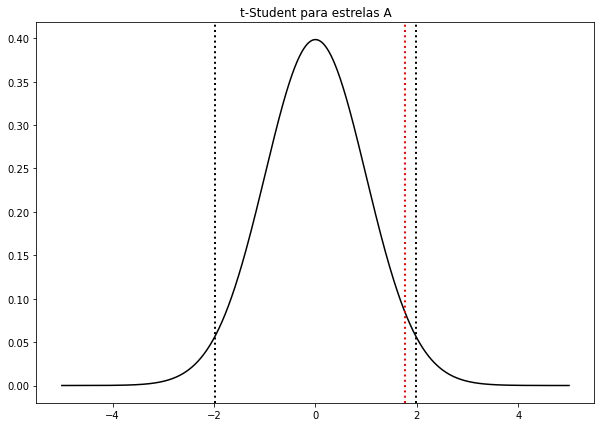

In [34]:
plt.figure(figsize = [10,7])
plt.title('t-Student para estrelas A')
plt.plot(t_dist,prob,'k')
plt.axvline(tstudent(x_1,x_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** não pode ser rejeitada seguindo nosso nivel de significancia. Isso significa que suas MÉDIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição. Em outras palavras, isso significa que o fluxo médio das estrelas A1 e A2 cai numa faixa que esperaríamos observar 95 vezes em cem num universo que **H0** seja verdadeira. 
 
 > Se caísse na faixa vista apenas 5 em cem vezes, consideraríamos **H1** correta e descartaríamos **H0**, nesse caso, em média, 95 das vezes em cem estaríamos rejeitando **H0** de forma correta.

 - A mesma análise com a observação da Estrela B:

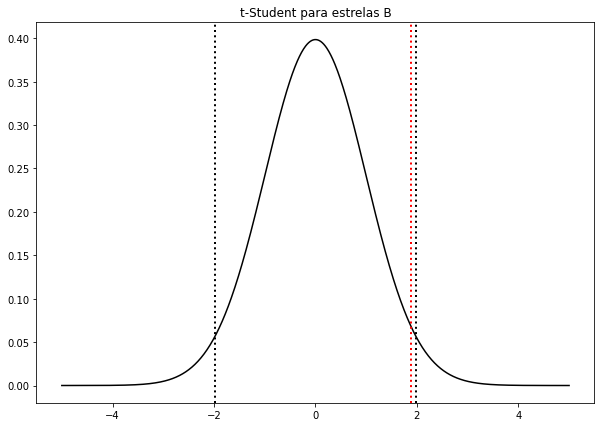

In [35]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=tstudent(y_1,y_2)[1])

plt.figure(figsize = [10,7])
plt.title('t-Student para estrelas B')
plt.plot(t_dist,prob,'k')
plt.axvline(tstudent(y_1,y_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=tstudent(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=tstudent(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** novamente não pode ser rejeitada. Isso pois suas MÉDIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição.

Agora iremos fazer o teste F para levarmos em consideração a variancia dos nossos dados.

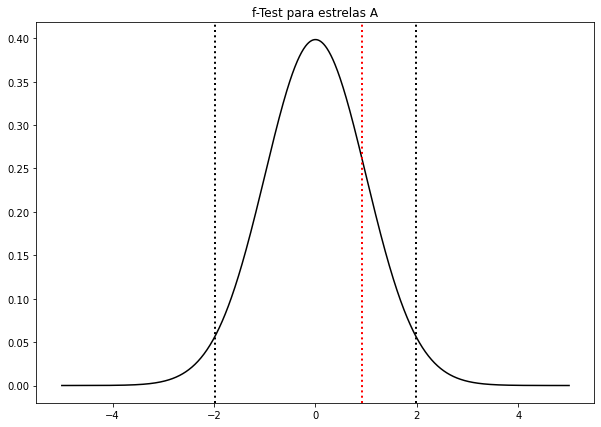

In [36]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=f_test(x_1,x_2)[1])

plt.figure(figsize = [10,7])
plt.title('f-Test para estrelas A')
plt.plot(t_dist,prob,'k')
plt.axvline(f_test(x_1,x_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=f_test(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=f_test(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** novamente não pode ser rejeitada. Isso pois suas VARIÂNCIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição.

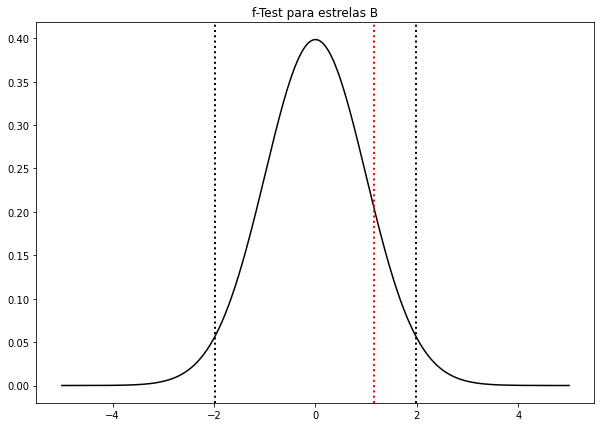

In [37]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=f_test(y_1,y_2)[1])

plt.figure(figsize = [10,7])
plt.title('f-Test para estrelas B')
plt.plot(t_dist,prob,'k')
plt.axvline(f_test(y_1,y_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=f_test(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=f_test(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** novamente não pode ser rejeitada. Isso pois suas VARIÂNCIAS sao equivalentes e, portanto, devem pertencer a mesma distribuição.

 - E afinal, qual a probabilidade destes dois conjuntos de dados serem equivalentes (tenham como origem a mesma distribuição)? 

Sabemos que os dados coletados estão dentro do universo **H0**. Ou seja, partindo que **H0** é verdadeiro (as estrelas observadas fazem parte da mesma distribuição), nossos dados concordam com a maioria das outras amostras que viriam da mesma distribuicao. Portanto, podemos afirmar com **95% de certeza** que os dados coletados *vem da mesma distribuição*.
> *Perceba que nesse caso as hipóteses foram escolhidas tal que 'ou elas pertencem ou não pertencem', e, seguindo as amostras coletadas, há 95% de chance dos dados terem vindo de duas estrelas da mesma dsitribuição*.

Perceba que nesses cálculos (em que usamos a função stats), **H0** muda de significado. Agora, ela é dada como sendo as médias equivalentes, pois é mais conveniente essa escolha de hipótese (ora, se sei que elas possuem alta probabilidade de terem correlação, então exijo mais provas para mudar de ideia e escolho como hipótese nula aquela mais forte). No cálculo do coeficiente de correlação, **H0** era referente à ausencia de correlação. Em outras palavras, **H0** significou 'estrelas **não pertencem** à mesma distribuição' e passou a significar 'estrelas **pertencem** à mesma distribuição'. Então, cuidado!

# 6)
## Como modelar dados e estimar parâmetros.

- Medida de dispersão para variáveis quantitativas e como funciona o calculo do desvio padrão:

Uma medida de dispersão para uma variável quantitativa é um indicador do grau de
espalhamento dos valores da amostra em torno da medida de centralidade.
Há diferentes formas de se medir a dispersão de uma variável quantitativa. Aqui serão
vistas a variância e o desvio-padrão.

Perceba que se queremos estimar o desvio de uma grandeza $A$ com N elementos (ou microestados), de forma que $A_{total} = \sum_{j=1}^{N} A_j$, e a média $\bar A = \frac{A_{total}}{N}$, é intuitivo imaginar que o desvio de apenas um dos elementos seria algo como:

Desvio = $A_j - \bar A$

Para todos os dados, teríamos algo como:

Desvio = $\sum_{j=1}^{N} (A_j - \bar A)$

No entanto, perceba que esse calculo nos resultaria em *zero*:

$D = \sum_{j=1}^{N} A_j - \sum_{j=1}^{N} \bar A = N\bar A - N\bar A = 0$

Portanto, essa forma de quantificar desvio não é muito inteligente. Digamos, então, que elevamos essas diferenças ao quadrado, de forma que todos os valores fiquem positivos.

$D = \sum_{j=1}^{N} (A_j - \bar A)^2$

Mas, dessa forma não teremos um desvio *de fato*, e sim um *desvio quadrático total* (além de estar elevado ao quadrado, ela depende da quantidade de elementos levantados, então mesmo um conjunto de dados com **altos desvios** teria desvio total menor do que uma lista **maior** de dados com **pequenos desvios**).

>Talvez, diante da tarefa de propor uma medida de dispersão, uma idéia natural fosse então calcular a média aritmética dos módulos dos desvios, ou seja, $\frac{\sum_{i = 1}^{n} |x_{i} - \bar x|}{n}$ . Entretanto, ela não é muito usada na prática, uma vez que não é tão fácil se estabelecerem as propriedades matemáticas de uma medida definida com o uso da função valor absoluto.

Portanto, faz sentido tirarmos a *média* deste desvio:

$D = \frac{\sum_{j=1}^{N} (A_j - \bar A)^2}{N}$

Tal desvio é o que chamamos de *variância* anteriormente. Na regressão iremos querer minimizar este valor. 
Perceba que em alguns livros teremos a variância abaixo:

$var(x) = \frac{\sum_{i = 1}^{n} (x_{i} - \tilde{x})^{2}}{n-1}$

Quando estamos tratando de dados, é preciso diferenciar o que seriam os parâmetros da nossa população e quais os parâmetros medidos da nossa amostra. Uma população terá média e variância tais que a média é $\bar A = \frac{A_{total}}{N}$ e variância $V = \frac{\sum_{j=1}^{N} (A_j - \bar A)^2}{N}$. No entanto, quando se trata das amostras, é necessário levar em conta que algumas podem estar enviesadas de forma que suas médias se afastem muito da média da população. Devido a esse comportamento, é preferível, em larga escala, calcular o desvio dividindo por um numero ligeiramente menor do que o tamanho da amostra, no caso a variância fica dividindo por $(n-1)$ (sendo **N** a quantidade de elementos da população e **n** a quantidade de elementos da amostra). Isso pois a variância, no fim, acaba ficando maior e, portanto, mais segura.

> **OBS**: Mais detalhes da matemática por trás dessa distinção podem ser vistos no *exemplo 11.4* na página 299 do livro *Estatística básica - Bussab e Morettin*

Lembrando que a unidade da variância é o quadrado da unidade dos dados. Por exemplo, se os dados forem medidos em metros, a unidade da variância será metro ao quadrado. Logo, para que se tenha o desvio *de fato* dos nossos dados, será necessário tirar sua raíz. É o que chamamos de **desvio padrão**.

- Regressão

A análise de regressão parecerá um elixir milagroso para nós que trabalhamos com estatística. Vejamos o caso a seguir:

Será que o estresse no emprego pode de fato nos ser prejudicial? Sim, há evidências fortes de que isso seja verdade.  No entanto, CEOs, que rotineiramente precisam tomar decisões de suma importância para a empresa, correm risco significativamente menor que suas secretárias. O tipo de estresse mais perigoso estaria, na verdade, associado a ter 'baixo controle' sobre as próprias responsabilidades. Diversos estudos envolvendo milhares de funcionários públicos britânicos descobriram que trabalhadores que têm pouco controle sobre suas atribuições têm uma taxa de mortalidade significativamente mais alta que outros trabalhadores com maior autoridade na tomada de decisões. Segundo essa pesquisa, o estresse prejudicial à saúde é aquele associado a lhe dizerem o que fazer enquanto você tem pouco a dizer sobre como e quando fazer. Como esses pesquisadores (estudo de Whitehall) puderam chegar a tal conclusão?

Nitidamente não se trata de um experimento aleatório. Não se pode designar seres humanos arbitrariamente a diferentes empregos e forçá-los a trabalhar neles por vários anos para então mensurar qual a maior taxa de mortalidade. 

Em vez disso, os pesquisadores britânicos coletaram detalhados dados longitudinais de milhares de indivíduos nesse serviço; esses dados podem ser analisados para identificar associações significativas, tais como uma ligação entre empregos de 'baixo controle' e doença cardíaca coronária. No entanto, uma associação simples não é suficiente para concluir que certos tipos de emprego são ruins para a saúde. Se meramente observamos que trabalhadores de baixo escalão na hierarquia do serviço civil britânico tem maior taxa de doenças cardíacas, nossos resultados seriam confundidos por outros fatores. Por exemplo, a distribuição de empregos de baixo escalão pode estar enviesada para uma população com menos acesso a educação e mais hábitos não saudáveis (como de fumar, por exemplo, talvez devido ao estresse do trabalho ou devido a uma infância mais dificil), ou seu salário mais baixo pode reduzir seu acesso a serviços de saúde. O ponto é que qualquer estudo que simplesmente compare resultados em termos de saúde num grupo grande de trabalhadores britânicos não nos dirá realmente muita coisa. Outras fontes de variação nos dados têm probabilidade de obscurecer a relação na qual estamos interessaos. Será que 'baixo controle no emprego' está realmente provocando doenças cardíacas?

A **análise de regressão** é a ferramenta estatística que nos ajuda a lidar com esse desafio. Especificamente, a análise de regressão nos permite quantificar a relação entre uma variável específica e um resultado que nos interessa enquanto *controlamos outros fatores*. Ou seja, podemos isolar o efeito de uma variável, como ter certo tipo de emprego, enquanto mantemos os efeitos das outras variáveis constantes. Os estudos WhiteHall usaram análise de regressão para medir os impactos sobre a saúde que o baixo controle no emprego tem entre pessoas que são similares em outros aspectos, como fumar. 

A maioria dos estudos os quais você lê nos jornais é baseada em análise de regressão. E agora veremos como ela funciona e quais os métodos mais utilizados. Quando *feita adequadamente*, a análise de regressão pode nos *ajudar a estimar* algum efeito que afete nossos dados separadamente de outros efeitos. 
> *Atenção às palavras destacadas*.

Em essência, a análise de regressão busca encontrar o 'melhor encaixe' para uma relação linear entre duas variáveis. Por exemplo, se pudermos plotar a relação altura e peso de uma amostra da população brasileira, veriamos que pessoas mais altas tenderiam a pesar mais - embora, obviamente, não seja sempre o caso. O padrão descrito *aproximadamente* no plot seria o de uma linha reta. 

In [38]:
dados = pd.read_csv('amostra.dat', delim_whitespace=True
                   )
df_1 = pd.DataFrame(data = dados.values, columns = ['Altura', 'Peso']
                   )

y = df_1['Peso']
x = df_1['Altura']

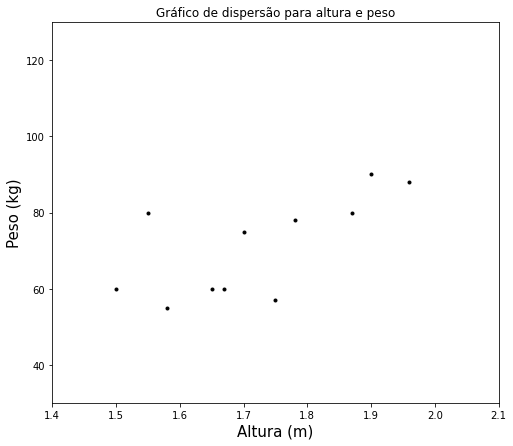

In [39]:
plt.figure(figsize = [8,7])
plt.title('Gráfico de dispersão para altura e peso')
plt.plot(x, y,'k.') 
plt.ylabel('Peso (kg)', fontsize=15)
plt.xlabel('Altura (m)',  fontsize=15)
plt.ylim(30,130)
plt.xlim(1.4,2.1)
plt.show()

Muitas retas são possíveis e amplamente consistentes com os dados. Mas como sabermos qual a melhor reta para esses dados? 
A análise de regressão usa tipicamente uma metodologia chamada **mínimos quadrados ordinários** (MQO). Esse método encaixa a reta que minimiza a soma dos residuais elevados ao quadrado. Cada observação nos nossos dados de altura e peso tem um residual, que é a distância vertical a partir da reta de regressão, exceto para aquelas observações que se situam diretamente em cima da reta, para as quais o residual vale zero. Quanto maior a soma geral dos residuais, pior é o encaixe da reta. 

In [40]:
def reta(x,a,b):
    return b + a*x
parameters, covariance = curve_fit(reta, x, y)
error = np.sqrt(np.diagonal(covariance))

In [41]:
y_modelo = reta(x,parameters[0] + error[0],parameters[1]- error[1])

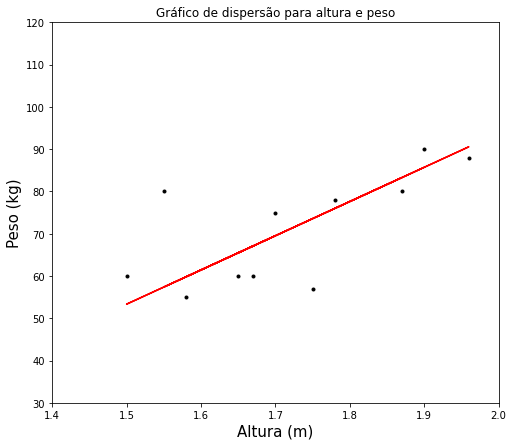

In [42]:
plt.figure(figsize = [8,7])
plt.title('Gráfico de dispersão para altura e peso')
plt.plot(x, y,'k.')
plt.plot(x,y_modelo,'r-')
plt.ylabel('Peso (kg)', fontsize=15)
plt.xlabel('Altura (m)',  fontsize=15)
plt.ylim(30,120)
plt.xlim(1.4,2.0)
plt.show()

Essa reta é conhecida como equação de regressão e assume a seguinte forma: y = ax + b, onde y é o peso em quilos e **b** é a intersecção da reta no eixo y (x = 0) e **a** é a inclinação da reta (descreve a melhor relação linear entre altura e peso nessa amostra). 

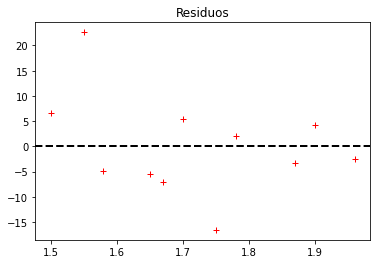

In [43]:
plt.title('Residuos')
plt.plot(x, y - y_modelo , 'r+')
plt.axhline(0, color='k', ls='--', lw=2)
plt.show()

>Perceba que o plot dos resíduos não parece fazer muito sentido. No entanto, ela ganha formas mais específicas quando nosso ajuste é piorado. Vejamos o exemplo de uma função seno abaixo.

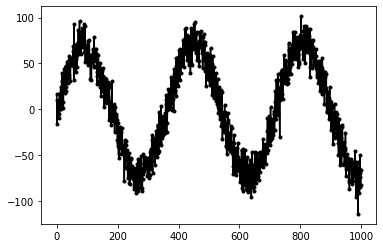

In [44]:
x, y = np.loadtxt('exemplo1_seno.dat', unpack=True)
plt.plot(x, y, 'k.-')
plt.show()

In [45]:
def function(param, x):
    '''
    Funcao que define um seno
    '''
    a = param[0]
    y = a * np.sin(np.deg2rad(x))
    return y

def residuo_quadrado(data, modelo):
    return np.sum((data - modelo)**2)

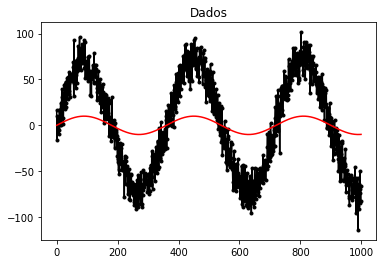

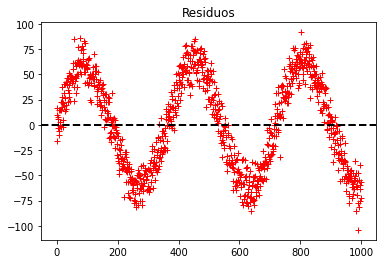

Soma dos quadrados dos residuos: 2059208.0348098518


In [46]:
y_modelo = function(param=[10], x=x)

plt.title('Dados')
plt.plot(x, y, 'k.-')
plt.plot(x, y_modelo, 'r-')
plt.show()

plt.title('Residuos')
plt.plot(x, y - y_modelo, 'r+')
plt.axhline(0, color='k', ls='--', lw=2)
plt.show()

print('Soma dos quadrados dos residuos:', residuo_quadrado(data=y, modelo=y_modelo))

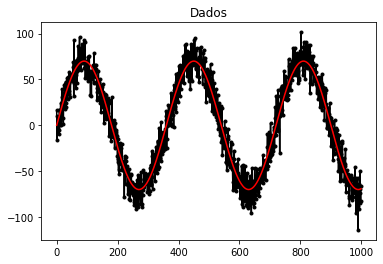

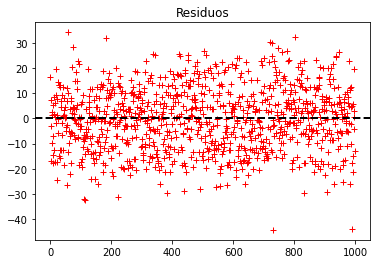

Soma dos quadrados dos residuos: 156053.21288761473


In [47]:
y_modelo = function(param=[70], x=x)

plt.title('Dados')
plt.plot(x, y, 'k.-')
plt.plot(x, y_modelo, 'r-')
plt.show()

plt.title('Residuos')
plt.plot(x, y - y_modelo, 'r+')
plt.axhline(0, color='k', ls='--', lw=2)
plt.show()

print('Soma dos quadrados dos residuos:', residuo_quadrado(data=y, modelo=y_modelo))


Vimos anteriormente como verificamos o coeficiente de correlação a fim de verificar se existe uma forte relação linear entre duas variáveis ou não. Supondo que a resposta tenha sido positiva, podemos partir dai para começar o calculo da equação da reta que representa essa relação.  

Costuma-se considerar aqui que $y$ é a variável a explicar (ou variável dependente) cujo comportamento se deseja explicar. Por outro lado, $x$ é a variável explicativa (ou variável independente) a ser usada para explicar o comportamento da variável $y$.

A equação da reta, portanto, pode ser usada para se estimar qual seria o valor $Y_0$ da variável resposta $y$ correspondente a um determinado valor $x_0$ da variável preditora $x$. Esse procedimento costuma ser utilizado principalmente nos casos em que a medição da variável resposta $y$ é mais cara, difícil ou demorada, enquanto a medição da variável explicativa $x$ é mais barata, fácil ou rápida.

 - Estimadores de mínimos quadrados

Um dos procedimentos mais usados para obter estimadores é aquele que se baseia no princípio dos mínimos quadrados, introduzido por Gauss em 1794, mas que primeiro apareceu com esse nome no apêndice do tratado de Legendre, Nouvelles Méthodes pour la Determination des Orbites des Comètes, publicado em Paris em 1806. Gauss somente viria a publicar seus resultados em 1809, em Hamburgo. Ambos utilizaram o princípio em conexão com problemas de Astronomia e Física.

    Exemplo 11.9 Bussab e Morettin:
    
Um engenheiro está estudando a resistência Y de uma fibra em função de seu diâmetro X e notou que as variáveis são aproximadamente proporcionais, isto é, elas obedecem à relação $Y \approx \theta X$.

Onde $\theta$ é o coeficiente de proporcionalidade. 

Agora ele deseja estimar o parâmetro θ, baseado numa amostra de cinco unidades, que, submetidas a mensuração e testes, produziram os resultados:

In [48]:
dados = pd.read_csv('exemplo11-9.dat', delim_whitespace=True
                   )
df_1 = pd.DataFrame(data = dados.values, columns = ['X', 'Y']
                   )

y = df_1['Y']
x = df_1['X']

In [49]:
df_1

,X,Y
0,1.2,3.9
1,1.5,4.7
2,1.7,5.6
3,2.0,5.8
4,2.6,7.0


In [50]:
df_1.describe()

,X,Y
count,5.000000,5.000000
mean,1.800000,5.400000
std,0.533854,1.172604
min,1.200000,3.900000
25%,1.500000,4.700000
50%,1.700000,5.600000
75%,2.000000,5.800000
max,2.600000,7.000000


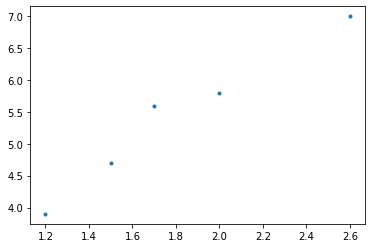

In [51]:
plt.plot(x,y,'.')
plt.show()

Inspecionando os resultados, conclui-se que θ = 3 parece ser um valor razoável. 
Mas, **como verificar a qualidade dessa estimativa?**

Podemos utilizar o modelo $Y = 3X$ e ver como esse prevê os valores de $Y$, para os dados valores de $X$, e como são as discrepâncias entre os valores observados e os estimados pelo modelo.

Criaremos uma coluna (Y – 3X) que conterá as medidas da inadequação do modelo para cada observação da amostra, enquanto o valor $\sum_{i=1}^{5} (Y_i - 3X_i)^{2}$ é uma tentativa de medir “**o erro quadrático total da amostra**”. 

Como em situações anteriores, elevou-se ao quadrado para evitar o problema do sinal. Quanto menor for o erro quadrático total, melhor será a estimativa. Isso nos sugere procurar a estimativa que torne mínima essa soma de quadrados.

In [52]:
df_1["Y - 3X"] = df_1['Y'] - 3*df_1['X']
df_1["(Y - 3X)^2"] = (df_1['Y'] - 3*df_1['X'])**2
df_1

,X,Y,Y - 3X,(Y - 3X)^2
0,1.2,3.9,0.3,0.09
1,1.5,4.7,0.2,0.04
2,1.7,5.6,0.5,0.25
3,2.0,5.8,-0.2,0.04
4,2.6,7.0,-0.8,0.64


 - Matematicamente, o problema passa a ser o de encontrar o valor de θ que minimize a função
    
    $S(\theta) = \sum_{i=1}^{5} (Y_i - \theta X_i)^2 $

O mínimo da função é obtido derivando-a em relação a θ, e igualando o resultado a zero. 

$\frac{dS}{d\theta} = 0 = \sum_{i=1}^{5} (Y_i - \theta X_i)(-2X_i)$
.:
$\theta_{MQ} = \frac{\sum_{i=1}^{5} X_i Y_ i}{\sum_{i=1}^{5} X_i^2}$

In [53]:
theta = np.sum(df_1["X"]*df_1['Y'])/np.sum(df_1['X']**2)
theta

2.9440599769319493

 - Portanto, o valor mínimo de S será:

In [54]:
S = np.sum((df_1['Y'] - theta*df_1['X'])**2)
S

1.005738177623991

- Observe que, quando usamos $\theta = 3$:

In [55]:
np.sum(df_1['(Y - 3X)^2'])

1.0600000000000014

Como foi dito, não esperávamos uma relação perfeita entre as duas variáveis, já que o diâmetro da fibra não é o único responsável pela resistência; outros fatores não controlados afetam o resultado. Desse modo, duas amostras obtidas do mesmo diâmetro $X$ não teriam obrigatoriamente que apresentar o mesmo resultado $Y$, mas valores em torno de um valor esperado $\theta X$.
Em outras palavras, estamos supondo que, para um dado valor da variável explicativa $X$, os valores da variável resposta $Y$ seguem uma distribuição de probabilidade centrada em θ$X$.

In [56]:
parameters, covariance = curve_fit(reta, x, y)
error = np.sqrt(np.diagonal(covariance))
y_modelo = reta(x,parameters[0] + error[0],parameters[1]- error[1])

Melhor ajuste sendo a reta y = 2.14x + 1.5.


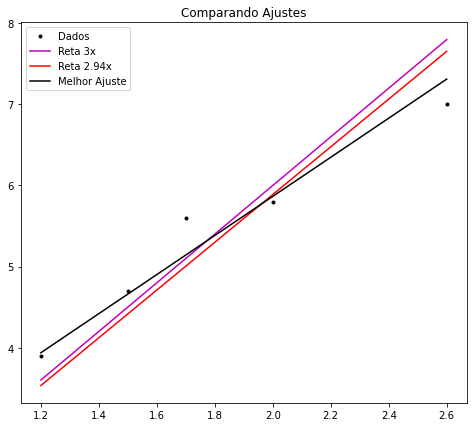

In [57]:
plt.figure(figsize = [8,7])
plt.title('Comparando Ajustes')
plt.plot(x,y,'k.')
plt.plot(x,reta(x,3,0),'m-')
plt.plot(x,reta(x,theta,0),'r-')
plt.plot(x,y_modelo,'k-')
plt.legend(['Dados', 'Reta 3x','Reta 2.94x','Melhor Ajuste'])
print('Melhor ajuste sendo a reta y = 2.14x + 1.5.')
plt.show()

É comum supor que ε tem a mesma distribuição, para todo valor x da variável explicativa X. Desse modo, é comum escrever: 
$Y = \theta X + \epsilon$.

Sendo:

$\epsilon_i = Y_i – \theta X_i$;

Ou seja, é justamente o desvio vertical (eixo y) de cada ponto! Lembre-se de nossa tentativa de definir **desvio** no inicio deste capítulo. 

Temos também que:

$\sum_{i=1}^{5} \epsilon_{i}^{2} = \sum_{i=1}^{5} (Y_i - \theta X_i)^2 = S(\theta)$.

Ou seja, quando minimizamos $S(\theta)$, estamos *de fato* minimizando os desvios totais relativos ao ajuste vs dados. A partir daí nosso ajuste fica completo. 
> Mais detalhes de como se calcula este erro $\epsilon$ pode ser visto na pagina 307 do livro "Estatística Básica - Bussab e Morettin".

 - Método Chi-quadrado
 
Método não paramétrico que faz comparação entre frequencias. Parte-se de amostras aleatórias e independentes.

Considere os dados observacionais já categorizados e um modelo e hipótese que prevê a população de cada categoria. A estatística *qui-quadrado* descreve a qualidade do ajuste dos dados ao modelo. Se os números *observados* em cada um dos $𝑘$ elementos forem $O_i$ e os **valores esperados do modelo** forem $E_i$, então esta estatística é:

$X^{2} = \sum_{i=1}^{k} \frac{(O_i - E_i)^{2}}{E_i}$

Bem parecido com o método dos *mínimos quadrados* 
>Dê uma olhada e compare-os! 

O método qui-quadrado mínimo de ajuste do modelo consiste em minimizar a estatística qui-quadrado variando os parâmetros do modelo. **A premissa na qual esta técnica se baseia é que o modelo é considerado qualitativamente correto e é ajustado para minimizar (via 𝑋2) as diferenças entre 𝐸𝑖 e 𝑂𝑖** que são consideradas devidas apenas a flutuações estatísticas.

Na prática, a busca de parâmetros é bastante fácil desde que o número de parâmetros seja menor que quatro; se houver quatro ou mais, procedimentos de busca sofisticados podem ser necessários.

Um exemplo bem simples para verificar a premissa do teste qui-quadrado é o do levantamento de votação para dada decisão feita em sala. Digamos que numa sala de 100 pessoas, 38 escolham a decisão A, 25 a decisão B e assim por diante, como mostra abaixo:

In [16]:
levantamento = np.array([[38,25,16,12,9]])
df = pd.DataFrame(data = levantamento, index = ['Frequencia'], columns = ['A','B','C','D','E'])
df

,A,B,C,D,E
Frequencia,38,25,16,12,9


Nesse caso a **frequencia esperada** será aquela que diga qual o valor do voto de cada decisão sem que tenhamos feito o levantamento. Não há nada que nos faça pensar outra coisa que não o simples 100/5 = 20 para cada decisão. Então chamamos a frequencia esperada $f_{e} = 20$ para todas as colunas. 

A partir desse valor, calculamos também a flutuação em volta deste valor. Por isso, não é dificil imaginar que possamos adicionar algumas linhas ao nosso levantamento, tal que:

In [19]:
levantamento = np.array([38,25,16,12,9]) 
#Invertendo a tabela por conveniencia
df = pd.DataFrame(data = levantamento, 
                  index = ['A','B','C','D','E'], 
                  columns = ['Frequencia']
                 )
df['Frequencia Esperada'] = np.array([20,20,20,20,20])
df

,Frequencia,Frequencia Esperada
A,38,20
B,25,20
C,16,20
D,12,20
E,9,20


In [20]:
df['(f - fe)^2/fe'] = (df['Frequencia'] - df['Frequencia Esperada'])**2/df['Frequencia Esperada']
df

,Frequencia,Frequencia Esperada,(f - fe)^2/fe
A,38,20,16.20
B,25,20,1.25
C,16,20,0.80
D,12,20,3.20
E,9,20,6.05


> Perceba que quando dividimos pela frequencia esperada, voltamos à unidade de medida original (que haviamos perdido ao elevar ao quadrado).

A partir dos valores de chi-quadrado para cada decisão, podemos analisar esses dados de forma mais acertiva. No entanto, ainda nos falta um valor de base. Esse novo calculo se refere aos *graus de liberdade*:

$gl = k - 1$

Nesse caso, nosso grau de liberdade é 5-1 = 4. É basicamente o numero de categorias na distribuição de frequencia observada - 1.

A partir daqui podemos recuperar o valor do chi quadrado esperado (ja tabelado) para o grau de liberdade 4 (no caso, $X^{2} = 9,488 $), considerando significancia de 0,05 (tendo 95% de precisão).

O que isso significa é que, com 95% de certeza, valores chi-quadrado total de uma analise com 4 graus de liberdade menores que 9,488 indicam valores proximos (aproximadamente iguais), enquanto chi-quadrado maior de 9,488 significam valores consideravelmente diferentes, e, portanto, singificativos para uma análise. 

No nosso caso, o chi quadrado medido é:

In [22]:
np.sum(df['(f - fe)^2/fe'])

27.5

Portanto, os valores tabelados são significativamente diferentes entre si, e podemos afirmar que essas diferenças não são levadas apenas ao acaso, mas a preferencia pela decisão A é de fato real (em 95% das vezes que esse levantamento estiver sendo feito dessa maneira, nossa decisão estará correta).

Em alguns livros será comum encontrar que essa análise é uma **'análise do teste de qui-quadrado com 1 critério'**, pois nos propusemos a responder apenas uma pergunta e não precisamos separar os sujeitos em qualquer tipos de grupos.

Podemos separar o sujeito em mais grupos, por exemplo, se fossemos fazer um levantamento entre jovens e idosos sobre dois tipos diferentes de produtos. Poderíamos ir atrás da pergunta "qual produto vende mais para jovens?", e posteriormente ao levantamento perguntar "a diferença observada é de fato relevante?". A ideia do calculo é basicamente a mesma coisa, mas tendo o cuidado de calcular a média (valor esperado) de cada produto de forma separada. 

Portanto, se considerarmos um conjunto de dados vindo, por exemplo, de uma observação astronômica, e construirmos um modelo e uma hipótese que explique tais dados, o chi-quadrado nos dirá o quão bom o modelo está. Se trata de uma forma de quantificar a qualidade de nossa análise.

- Método Monte Carlo

O método Monte Carlo é uma técnica de simulação que utiliza a aleatoriedade para modelar fenômenos complexos e resolver problemas em diversas áreas, como física, engenharia, finanças, entre outras. Foi desenvolvido durante o projeto Manhattan, com o objetivo de auxiliar nos cálculos de integrais em hiperplanos. Ao invés de calcular a área por baixo de um curva, agora será possível sortear N numeros aleatórios num dado espaço, e fazer a relação $N_{BaixoCurva}$/$N_{total}$.

O método recebe esse nome em homenagem ao famoso cassino de Monte Carlo, em Mônaco, onde a probabilidade e o acaso são elementos fundamentais dos jogos de azar. A ideia é simular um grande número de experimentos aleatórios para obter uma estimativa estatística do resultado de interesse.

Para aplicar o método Monte Carlo, é necessário seguir alguns passos básicos:

1-Definir um modelo matemático que descreva o fenômeno ou sistema em questão;

2-Escolher valores para as variáveis do modelo que sejam representativos do problema em análise;

3-Gerar um grande número de amostras aleatórias para cada uma das variáveis escolhidas;

4-Calcular o resultado de interesse para cada uma das amostras geradas, utilizando o modelo matemático;

5-Obter uma estimativa estatística do resultado de interesse a partir dos valores calculados nas amostras.

O método Monte Carlo é amplamente utilizado em simulações numéricas, cálculo de integrais complexas, análise de risco e tomada de decisões em finanças, entre outras áreas. Ele é uma ferramenta poderosa para lidar com problemas que envolvem incertezas e complexidade, permitindo a obtenção de resultados precisos e confiáveis.

Lembremos formas diferentes de conseguirmos uma distribuição aleatória usando programação:

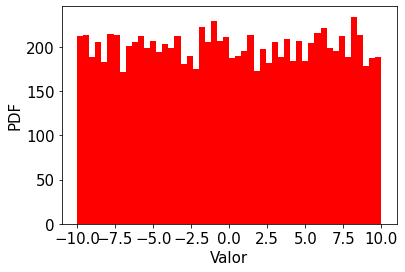

Média da distribuição: -3.4207923870875456


In [20]:
distribuicao = np.random.uniform(low=-10, high=+10, size=10000) 
#Distribuição aleatória e uniforme
plt.hist(distribuicao, color='red', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print ('Média da distribuição: '+str(distribuicao[np.random.randint(0, 10000, 2)].mean()))

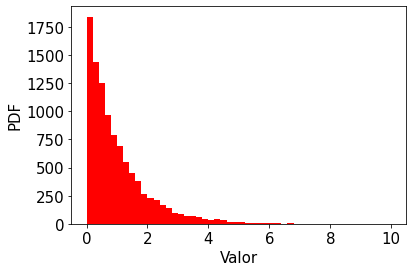

In [23]:
distribuicao = np.random.exponential(scale=+1, size=10000)

plt.hist(distribuicao, color='red', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Perceba que estamos sorteando numeros aleatórios que estão 'presos' em dado limite (nos casos, casosda distribuição segue uma função diferente). A partir desses dados, podemos comparar o que esperamos de uma distribuição, por exemplo, exponencial e comparar com nossos dados (digamos que temos algo que se assemelhe com uma exponencial, gostariamos de saber o quão diferente ela está de dados aleatorios que sigam a mesma distribuição). Um bom exemplo do quanto este método pode ser útil é **agulha de Buffon**, um método desenvolvido no século XVIII para o cálculo do *pi* a partir de numeros aleatórios. O método de Monte Carlo torna o exercicio trivial.

Não é surpresa perceber que o método Monte Carlo é muito útil para analisar dados do passado e predizer o futuro. Ela é usada para estimar os possíveis resultados de um evento incerto. Sendo o **acaso** o principal elemento da abordagem deste tipo de modelagem. 

Imagine que, por exemplo, desejamos conhecer os preços de certa mercadoria no passado, e tentar aplicar alguma equação que possa predizer sua variação no futuro. Com dados suficientes, é possível estimar um valor com certa precisão.

>Algo como preço_de_hoje = preço_de_ontem * $e^{r}$
>> Bastando achar o r com base num banco de dados, e, posteriormente, simular várias variações diferentes do preço da mesma mercadoria.

Vejamos um exemplo de como este método é utilizado no mercado financeiro.

>> Tenho uma carteira com 5 ações. Dado a distribuição dos retornos dessa carteira no último ano, qual será o máximo de prejuízo que posso sofrer nos próximos 3 anos (confiança de 95%) e qual a probabilidade de eu obter lucro?

A solução se faz em simular 10.000 cenários da carteira com 5 ações nos próximos 3 anos e criar uma dritribuição de retornos com os cenários. Para isso, vamos utilizar Monte Carlo.

In [19]:
#Obtendo dados

lista_acoes = ['WEGE3','PCAR3','LREN3','PETR4','VALE3'] #pegando as ações mais famosas da bolsa
lista_acoes = [acao + ".SA" for acao in lista_acoes] #para conseguir puxar os dados da yfinance

#data_final = dt.datetime.now()
#data_inicial = data_final - dt.timedelta(days=300)
#precos = pdr.get_data_yahoo(lista_acoes, data_inicial, data_final)['Adj Close'] 

#|_> não funcionou, provavelmente devido a má compatibilidade com as variaveis de tempo e a API yahoo

data_final = pd.Timestamp.today()
data_inicial = data_final - pd.DateOffset(months=12)

precos = yf.download(lista_acoes, start=data_inicial, end=data_final)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [21]:
retornos = precos.pct_change().dropna()
media_retornos = retornos.mean()
matriz_covariancia = retornos.cov()
pesos_carteira = np.full(len(lista_acoes), 1/len(lista_acoes))
numero_acoes = len(lista_acoes)

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [22]:
retornos

,LREN3.SA,PCAR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2022-04-05,-0.048656,0.010972,-0.009480,-0.028895,-0.011136
2022-04-06,-0.032546,-0.002713,-0.000926,0.015140,-0.008663
2022-04-07,-0.008503,-0.003887,0.051916,0.006007,-0.006117
2022-04-08,-0.003356,-0.003121,0.004994,-0.020385,0.000586
2022-04-11,0.000748,-0.022309,-0.007600,-0.012086,-0.046573
...,...,...,...,...,...
2023-03-29,-0.048685,0.016621,0.013141,0.014363,0.008702
2023-03-30,0.037647,0.023161,0.002929,0.016271,0.003115
2023-03-31,-0.060658,-0.019308,-0.021694,-0.018700,-0.031295


In [23]:
media_retornos

LREN3.SA   -0.002035
PCAR3.SA   -0.001722
PETR4.SA    0.001293
VALE3.SA   -0.000352
WEGE3.SA    0.000781
dtype: float64

- Mini-aula:

>Retornos sintéticos = média dos retornos + Rpdf x L

>>Rpdf = Matriz aleatória gerada por uma função de densidade de probabilidade. No Mercado utilizamos muito a distribuição normal.

>>L = Matriz triangular inferior proveniente de uma decomposição de Cholesky, usando como base a matriz covariancia.

Iremos assumir que a distribuição de retornos é uma distribuição normal multivariada. Basicamente iremos pegar a média de retorno de cada ação e somar valores aleatórios com base no quanto flutuou no ultimo ano. No entanto, cada vetor_retorno de cada ação é correlacionado uma com as outras. Isso significa que nossos valores aleatórios precisam respeitar essa correlação, para que a previsão faça sentido (por isso utilizamos a matriz **L**).

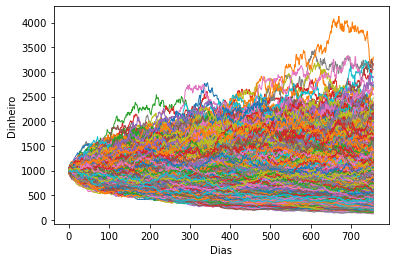

In [27]:
## premissas montecarlo

numero_simulacoes = 10000
dias_projetados = 252*3 #252 dias uteis
capital_inicial = 1000 #o que vai ocorrer com 1000 reais?

#gerando retorno medio em forma de matriz

retorno_medio = retornos.mean(axis = 0).to_numpy()
matriz_retorno_medio = retorno_medio*np.ones(shape = (dias_projetados,numero_acoes))

#Nossa matriz L

L = LA.cholesky(matriz_covariancia)

#Gerando simulações

retornos_carteira = np.zeros([dias_projetados, numero_simulacoes])
montante_final = np.zeros(numero_simulacoes)

for s in range(numero_simulacoes):
    
    Rpdf = np.random.normal(size = (dias_projetados, numero_acoes))
    retornos_sinteticos = matriz_retorno_medio + np.inner(Rpdf, L) #Unico parametro aleatorio é Rpdf
    
    retornos_carteira[:,s] = np.cumprod(np.inner(pesos_carteira, retornos_sinteticos) + 1) * capital_inicial
    montante_final[s] = retornos_carteira[-1,s]
    
## Visualizando o retorno em 10.000 'realidades diferentes'
plt.plot(retornos_carteira,linewidth = 1)
plt.ylabel('Dinheiro')
plt.xlabel('Dias')
plt.show()

In [45]:
#Criando as estatísticas para a nossa análise de carteira

montante_99 = str(np.percentile(montante_final,1))
montante_95 = str(np.percentile(montante_final,5))
montante_mediano = str(np.percentile(montante_final, 50))
cenarios_com_lucro = str(round((len(montante_final[montante_final > 1000])/len(montante_final))*100,2))+"%"

print("Ao investir R$ 1000,00 na carteira " + str(lista_acoes), "o resultado esperado para os próximos 3 anos, seguindo o método Monte Carlo com 10.000 simulações: \n")
print("50% de chance do montante ser maior que R$"+str(montante_mediano))
print("95% de chance do montante ser maior que R$"+str(montante_95))
print("99% de chance do montante ser maior que R$"+str(montante_99))
print("Cenários com lucro: "+str(cenarios_com_lucro))


Ao investir R$ 1000,00 na carteira ['WEGE3.SA', 'PCAR3.SA', 'LREN3.SA', 'PETR4.SA', 'VALE3.SA'] o resultado esperado para os próximos 3 anos, seguindo o método Monte Carlo com 10.000 simulações: 

50% de chance do montante ser maior que R$662.8306288879071
95% de chance do montante ser maior que R$325.3332369670531
99% de chance do montante ser maior que R$239.16887545699646
Cenários com lucro: 17.63%


A partir dessas métricas, é possível calcular VAR da carteira para diferentes intervalos de confiança e medir se o risco que iremos correr é compatível com o que aguentamos perder. Esta é só uma das utilidades do Monte Carlo.

## Final

Em conclusão, a estatística e a programação são habilidades essenciais para a análise de dados em diversos campos, desde **a astrofísica até o mercado financeiro**. É fundamental entender os conceitos estatísticos e ter habilidades em programação para extrair informações valiosas dos dados e tomar decisões informadas.

Através deste guia, espero ter oferecido uma revisão clara e concisa desses tópicos, com exemplos relevantes e esclarecedores. Agradeço a atenção! 

Qualquer dúvida ou sugestão, mande-me e-mail: thiagolaidler@gmail.com

In [1]:
######## Conversor para PDF #################
#!jupyter nbconvert --to webpdf --allow-chromium-download Síntese_Estatística.ipynb

[NbConvertApp] Converting notebook Síntese_Estatística.ipynb to webpdf
[NbConvertApp] Writing 862976 bytes to Síntese_Estatística.pdf


**Referências:**
>    Aulas do prof Bruno Morgado OV-UFRJ

>    (Cambridge) J.V. Wall, C. R. Jenkins - Practical Statistics for Astronomers (2003)

>    João Ismael, Estatística básica a arte de trabalhar com dados (2009)

>    P.Morettin, Estatística Básica (2010)

>    Charles Wheelan, Estatística, o que é, para que serve, como funciona.

>    Leonard Mlodinow, O Andar do Bêbado - Como o Acaso Determina Nossas Vidas
    